In [75]:
import pymc3 as pm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az
import re

In [2]:
full = pd.read_csv("Data/full_data.csv")
full.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,All_NBA_Pos,All_NBA_Team,All_NBA_Pts_Won,All_NBA_Pts_Max,All_NBA_Share,All_NBA_1st_Team_Votes,All_NBA_2nd_Team_Votes,All_NBA_3rd_Team_Votes,year,All_NBA_Boolean
0,Kareem Abdul-Jabbar*,C,41,LAL,74,1695,12.9,0.511,0.005,0.250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988-1989,False
1,Mark Acres,C,26,BOS,62,632,8.2,0.507,0.009,0.421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988-1989,False
2,Michael Adams,PG,26,DEN,77,2787,17.5,0.567,0.431,0.363,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988-1989,False
3,Mark Alarie,PF,25,WSB,74,1141,13.3,0.531,0.088,0.202,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988-1989,False
4,Randy Allen,SG,24,SAC,7,43,6.9,0.428,0.053,0.105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988-1989,False


In [73]:
len(full)

15443

In [3]:
## Remove All ALL Stats except boolean All_Stars
remove_all_star = full.loc[:, ~full.columns.str.startswith('All_')]
remove_all_star["All_NBA_Boolean"] = full["All_NBA_Boolean"]
remove_all_star.head()

/var/folders/pn/dgy7ckd90nl7mlj6g6rc_1kw0000gn/T/ipykernel_20010/1871535054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_all_star["All_NBA_Boolean"] = full["All_NBA_Boolean"]


,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,player_id,year,All_NBA_Boolean
0,Kareem Abdul-Jabbar*,C,41,LAL,74,1695,12.9,0.511,0.005,0.250,...,2.0,2.9,0.082,-1.9,-0.2,-2.1,0.0,abdulka01,1988-1989,False
1,Mark Acres,C,26,BOS,62,632,8.2,0.507,0.009,0.421,...,0.5,0.9,0.066,-3.0,-0.4,-3.4,-0.2,acresma01,1988-1989,False
2,Michael Adams,PG,26,DEN,77,2787,17.5,0.567,0.431,0.363,...,2.9,8.3,0.143,2.7,0.2,2.9,3.4,adamsmi01,1988-1989,False
3,Mark Alarie,PF,25,WSB,74,1141,13.3,0.531,0.088,0.202,...,1.0,2.2,0.093,-1.1,-0.8,-2.0,0.0,alarima01,1988-1989,False
4,Randy Allen,SG,24,SAC,7,43,6.9,0.428,0.053,0.105,...,0.0,0.0,-0.035,-5.5,-1.7,-7.2,-0.1,allenra01,1988-1989,False


In [4]:
remove_nan = remove_all_star.dropna()
remove_nan

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,player_id,year,All_NBA_Boolean
0,Kareem Abdul-Jabbar*,C,41,LAL,74,1695,12.9,0.511,0.005,0.250,...,2.0,2.9,0.082,-1.9,-0.2,-2.1,0.0,abdulka01,1988-1989,False
1,Mark Acres,C,26,BOS,62,632,8.2,0.507,0.009,0.421,...,0.5,0.9,0.066,-3.0,-0.4,-3.4,-0.2,acresma01,1988-1989,False
2,Michael Adams,PG,26,DEN,77,2787,17.5,0.567,0.431,0.363,...,2.9,8.3,0.143,2.7,0.2,2.9,3.4,adamsmi01,1988-1989,False
3,Mark Alarie,PF,25,WSB,74,1141,13.3,0.531,0.088,0.202,...,1.0,2.2,0.093,-1.1,-0.8,-2.0,0.0,alarima01,1988-1989,False
4,Randy Allen,SG,24,SAC,7,43,6.9,0.428,0.053,0.105,...,0.0,0.0,-0.035,-5.5,-1.7,-7.2,-0.1,allenra01,1988-1989,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15438,Tremont Waters,PG,24,TOT,3,50,5.4,0.357,0.643,0.000,...,0.1,0.0,-0.042,-7.8,0.1,-7.7,-0.1,watertr01,2021-2022,False
15439,Derrick White,SG,27,TOT,75,2199,14.8,0.549,0.461,0.294,...,2.3,5.1,0.111,0.4,0.6,0.9,1.6,whitede01,2021-2022,False
15440,Justise Winslow,SF,25,TOT,48,774,13.1,0.479,0.257,0.257,...,1.1,0.8,0.048,-2.7,1.0,-1.7,0.1,winslju01,2021-2022,False
15441,Moses Wright,PF,23,TOT,4,14,18.3,0.470,0.250,0.750,...,0.0,0.1,0.180,1.1,0.4,1.4,0.0,wrighmo01,2021-2022,False


In [5]:
pd.factorize(remove_nan.year)

(array([ 0,  0,  0, ..., 33, 33, 33]),
 Index(['1988-1989', '1989-1990', '1990-1991', '1991-1992', '1992-1993',
        '1993-1994', '1994-1995', '1995-1996', '1996-1997', '1997-1998',
        '1998-1999', '1999-2000', '2000-2001', '2001-2002', '2002-2003',
        '2003-2004', '2004-2005', '2005-2006', '2006-2007', '2007-2008',
        '2008-2009', '2009-2010', '2010-2011', '2011-2012', '2012-2013',
        '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018',
        '2018-2019', '2019-2020', '2020-2021', '2021-2022'],
       dtype='object'))

In [6]:
season_idxs, seasons = pd.factorize(remove_nan.year)
coords = {
    "season": seasons,
    "obs_id": np.arange(len(season_idxs)),
}
coords

{'season': Index(['1988-1989', '1989-1990', '1990-1991', '1991-1992', '1992-1993',
        '1993-1994', '1994-1995', '1995-1996', '1996-1997', '1997-1998',
        '1998-1999', '1999-2000', '2000-2001', '2001-2002', '2002-2003',
        '2003-2004', '2004-2005', '2005-2006', '2006-2007', '2007-2008',
        '2008-2009', '2009-2010', '2010-2011', '2011-2012', '2012-2013',
        '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018',
        '2018-2019', '2019-2020', '2020-2021', '2021-2022'],
       dtype='object'),
 'obs_id': array([    0,     1,     2, ..., 15379, 15380, 15381])}

In [7]:
season_idxs

array([ 0,  0,  0, ..., 33, 33, 33])

In [8]:
seasons

Index(['1988-1989', '1989-1990', '1990-1991', '1991-1992', '1992-1993',
       '1993-1994', '1994-1995', '1995-1996', '1996-1997', '1997-1998',
       '1998-1999', '1999-2000', '2000-2001', '2001-2002', '2002-2003',
       '2003-2004', '2004-2005', '2005-2006', '2006-2007', '2007-2008',
       '2008-2009', '2009-2010', '2010-2011', '2011-2012', '2012-2013',
       '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018',
       '2018-2019', '2019-2020', '2020-2021', '2021-2022'],
      dtype='object')

In [9]:
import theano.tensor as T
def logistic(l):
    return 1 / (1 + T.exp(-l))

In [10]:
remove_nan.columns[1:-2]

Index(['Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'player_id'],
      dtype='object')

In [77]:
numeric_col = pd.DataFrame(remove_nan.dtypes[:-1]).reset_index()
numeric_col = numeric_col[numeric_col[0] != 'object']
numeric_col.columns = ['name', 'type']
numeric_col

,name,type
2,Age,int64
4,G,int64
5,MP,int64
6,PER,float64
7,TS%,float64
8,3PAr,float64
9,FTr,float64
10,ORB%,float64
11,DRB%,float64
12,TRB%,float64


In [119]:
for i,k in enumerate([numeric_col.name[20]]):
    print(i,k)

0 WS


In [143]:
for i,col in enumerate([numeric_col.name[25]]):
    with pm.Model(coords=coords) as hierarchical_model:
        # season_idx = pm.Data("season_idx", season_idxs, dims="obs_id")
        # # Hyperpriors for group nodes
        # mu_a = pm.Normal("mu_a", mu=0.0, sigma=10000)
        # sigma_a = pm.HalfNormal("sigma_a", 5.0)
        # mu_b = pm.Normal("mu_b", mu=0.0, sigma=10000)
        # sigma_b = pm.HalfNormal("sigma_b", 5.0)


        # Intercept for each county, distributed around group mean mu_a
        # Above we just set mu and sd to a fixed value while here we
        # plug in a common group distribution for all a and b (which are
        # vectors of length n_counties).
        a = pm.Normal("a", mu=0, sigma=10)
        # effect difference between basement and floor level
        b = pm.Normal("b", mu=0, sigma=10)
        # b_offset = pm.Normal('b_offset', mu=0, sd=1, shape=len(np.unique(season_idxs)))
        # b = pm.Deterministic("b", mu_b + b_offset * sigma_b)
        
        nba_est = a + b * remove_nan[col].values

        # Data likelihood
        nba_like = pm.Bernoulli(
            "nba_like",
            # p=logistic(nba_est),
            logit_p = nba_est,
            observed=remove_nan.All_NBA_Boolean.astype(int).values
        )

In [144]:
with hierarchical_model:
    hierarchical_trace = pm.sample(1000, tune=1000, target_accept=0.9, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.
The number of effective samples is smaller than 25% for some parameters.


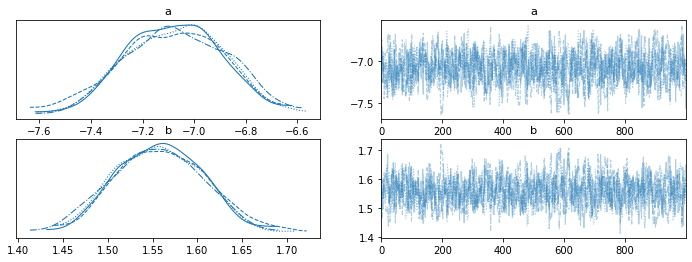

In [145]:
pm.plots.traceplot(hierarchical_trace);

In [139]:
master_df = []
# for i,col in enumerate(numeric_col.name[0:1]):
for i,col in enumerate([numeric_col.name[25]]):
    with pm.Model(coords=coords) as hierarchical_model:
        season_idx = pm.Data("season_idx", season_idxs, dims="obs_id")
        # Hyperpriors for group nodes
        mu_a = pm.Normal("mu_a", mu=0.0, sigma=10000)
        sigma_a = pm.HalfNormal("sigma_a", 5.0)
        mu_b = pm.Normal("mu_b", mu=0.0, sigma=10000)
        sigma_b = pm.HalfNormal("sigma_b", 5.0)


        # Intercept for each county, distributed around group mean mu_a
        # Above we just set mu and sd to a fixed value while here we
        # plug in a common group distribution for all a and b (which are
        # vectors of length n_counties).
        a = pm.Normal("a", mu=mu_a, sigma=sigma_a, dims="season")
        # effect difference between basement and floor level
        # b = pm.Normal("b", mu=mu_b, sigma=sigma_b, dims="season")
        b_offset = pm.Normal('b_offset', mu=0, sd=1, shape=len(np.unique(season_idxs)))
        b = pm.Deterministic("b", mu_b + b_offset * sigma_b)
        
        nba_est = a[season_idx] + b[season_idx] * remove_nan[col].values

        # Data likelihood
        nba_like = pm.Bernoulli(
            "nba_like",
            # p=logistic(nba_est),
            logit_p = nba_est,
            observed=remove_nan.All_NBA_Boolean.astype(int).values
        )
    # with hierarchical_model:
        hierarchical_trace = pm.sample(1000, tune=1000, target_accept=0.9, return_inferencedata=True)
        df = pm.summary(hierarchical_trace).reset_index().rename(columns={"index":"distribution"})
        df['predictor'] = [col]*len(df)
        master_df.append(df)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b_offset, a, sigma_b, mu_b, sigma_a, mu_a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 81 seconds.
There were 163 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7760053101824518, but should be close to 0.9. Try to increase the number of tuning steps.
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.
There were 82 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8242408532688801, but should be close to 0.9. Try to increase the number of tuning steps.
There were 561 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.4335023611426154, but should be close to 0.9. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during samp

In [111]:
hierarchical_trace.posterior['sigma_b'][0]

<xarray.DataArray 'sigma_b' (draw: 1000)>
array([0.00453152, 0.00428604, 0.00383138, 0.00542553, 0.00696858,
       0.00509162, 0.0044649 , 0.00666955, 0.00508931, 0.0058294 ,
       0.00353162, 0.00360523, 0.00247935, 0.00304134, 0.00293244,
       0.00302254, 0.00245311, 0.00237499, 0.00186225, 0.00239247,
       0.00223529, 0.00196312, 0.00205576, 0.00189832, 0.0019208 ,
       0.00141215, 0.00178878, 0.00204744, 0.0014805 , 0.00124183,
       0.00112208, 0.00127363, 0.00089676, 0.00082161, 0.00082743,
       0.00084495, 0.00084657, 0.00109157, 0.00108734, 0.00106673,
       0.00130775, 0.00160088, 0.00113584, 0.00145824, 0.00144687,
       0.00096819, 0.00147248, 0.0011679 , 0.00125419, 0.00100846,
       0.00103984, 0.00110652, 0.00068877, 0.00077406, 0.00088648,
       0.00102747, 0.00103958, 0.00099605, 0.00079459, 0.00086979,
       0.00101247, 0.00105697, 0.00062048, 0.00064939, 0.00087425,
       0.0009216 , 0.00095992, 0.00096929, 0.0009467 , 0.00097277,
       0.00096779, 0.00104659, 0.00068467, 0.00072661, 0.00075474,
       0.00069021, 0.00075272, 0.00065534, 0.00069557, 0.00078365,
       0.00073608, 0.00060226, 0.00058218, 0.00058218, 0.00058218,
       0.00058218, 0.00058218, 0.00058218, 0.00058218, 0.00058218,
       0.0006408 , 0.00073288, 0.00075369, 0.00111853, 0.00057089,
       0.00057089, 0.00057089, 0.00055558, 0.0005568 , 0.0005385 ,
...
       0.00041712, 0.00041712, 0.00041712, 0.00041712, 0.00041712,
       0.00041712, 0.00041712, 0.00041712, 0.00041712, 0.00041712,
       0.00041382, 0.00041479, 0.00041479, 0.00040734, 0.00041019,
       0.00041019, 0.00041019, 0.00040633, 0.00039847, 0.00041196,
       0.00040087, 0.00040087, 0.00040087, 0.00040087, 0.00040087,
       0.00041072, 0.00041195, 0.00041195, 0.00041195, 0.00041195,
       0.00041195, 0.00041195, 0.00041195, 0.00041195, 0.0004128 ,
       0.0004128 , 0.0004128 , 0.0004128 , 0.0004131 , 0.00041055,
       0.00040811, 0.00041164, 0.00041164, 0.00041164, 0.00041164,
       0.00041164, 0.00041164, 0.00040267, 0.00040267, 0.00040664,
       0.00040664, 0.00040664, 0.00040664, 0.00040664, 0.00040664,
       0.00040664, 0.00040664, 0.00040664, 0.00042238, 0.00041775,
       0.00039255, 0.00039255, 0.00040088, 0.00040088, 0.00040724,
       0.00040724, 0.00040724, 0.00040209, 0.00040209, 0.00040209,
       0.00040209, 0.00040209, 0.00040209, 0.00040209, 0.00040209,
       0.00040209, 0.00040209, 0.00040209, 0.00039356, 0.00039356,
       0.00039356, 0.00038442, 0.0003875 , 0.0003875 , 0.00037492,
       0.00037986, 0.00037986, 0.00037986, 0.00037986, 0.00037986,
       0.00037986, 0.00037986, 0.00037986, 0.00037301, 0.00038594,
       0.00038594, 0.00038594, 0.00038594, 0.00038594, 0.0004022 ])
Coordinates:
    chain    int64 0
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999

In [123]:
remove_nan

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,player_id,year,All_NBA_Boolean
0,Kareem Abdul-Jabbar*,C,41,LAL,74,1695,12.9,0.511,0.005,0.250,...,2.0,2.9,0.082,-1.9,-0.2,-2.1,0.0,abdulka01,1988-1989,False
1,Mark Acres,C,26,BOS,62,632,8.2,0.507,0.009,0.421,...,0.5,0.9,0.066,-3.0,-0.4,-3.4,-0.2,acresma01,1988-1989,False
2,Michael Adams,PG,26,DEN,77,2787,17.5,0.567,0.431,0.363,...,2.9,8.3,0.143,2.7,0.2,2.9,3.4,adamsmi01,1988-1989,False
3,Mark Alarie,PF,25,WSB,74,1141,13.3,0.531,0.088,0.202,...,1.0,2.2,0.093,-1.1,-0.8,-2.0,0.0,alarima01,1988-1989,False
4,Randy Allen,SG,24,SAC,7,43,6.9,0.428,0.053,0.105,...,0.0,0.0,-0.035,-5.5,-1.7,-7.2,-0.1,allenra01,1988-1989,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15438,Tremont Waters,PG,24,TOT,3,50,5.4,0.357,0.643,0.000,...,0.1,0.0,-0.042,-7.8,0.1,-7.7,-0.1,watertr01,2021-2022,False
15439,Derrick White,SG,27,TOT,75,2199,14.8,0.549,0.461,0.294,...,2.3,5.1,0.111,0.4,0.6,0.9,1.6,whitede01,2021-2022,False
15440,Justise Winslow,SF,25,TOT,48,774,13.1,0.479,0.257,0.257,...,1.1,0.8,0.048,-2.7,1.0,-1.7,0.1,winslju01,2021-2022,False
15441,Moses Wright,PF,23,TOT,4,14,18.3,0.470,0.250,0.750,...,0.0,0.1,0.180,1.1,0.4,1.4,0.0,wrighmo01,2021-2022,False


In [132]:
import matplotlib.pyplot as plt
remove_nan['WS'].head()
remove_nan.groupby(['year'])['WS'].count()

#plt.scatter(remove_nan['WS'], remove_nan['All_NBA_Boolean'])

year
1988-1989    352
1989-1990    380
1990-1991    386
1991-1992    381
1992-1993    390
1993-1994    402
1994-1995    406
1995-1996    427
1996-1997    440
1997-1998    437
1998-1999    437
1999-2000    438
2000-2001    439
2001-2002    439
2002-2003    427
2003-2004    440
2004-2005    463
2005-2006    455
2006-2007    458
2007-2008    451
2008-2009    445
2009-2010    440
2010-2011    449
2011-2012    478
2012-2013    467
2013-2014    480
2014-2015    490
2015-2016    475
2016-2017    485
2017-2018    537
2018-2019    526
2019-2020    527
2020-2021    539
2021-2022    596
Name: WS, dtype: int64

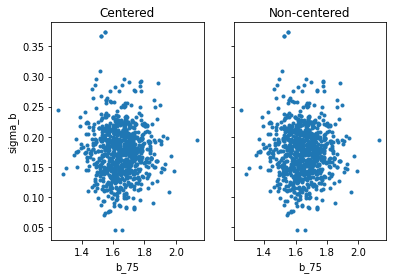

In [141]:
fig, axs = plt.subplots(ncols=2, sharex=True, sharey=True)

x = pd.Series(hierarchical_trace.posterior['b'][0][:,0], name='slope b_75')
y = pd.Series(hierarchical_trace.posterior['sigma_b'][0], name='slope group variance sigma_b')

axs[0].plot(x, y, '.');
axs[0].set(title='Centered', ylabel='sigma_b', xlabel='b_75')

x = pd.Series(hierarchical_trace.posterior['b'][0][:,0], name='slope b_75')
y = pd.Series(hierarchical_trace.posterior['sigma_b'][0], name='slope group variance sigma_b')

axs[1].plot(x, y, '.');
axs[1].set(title='Non-centered', xlabel='b_75');

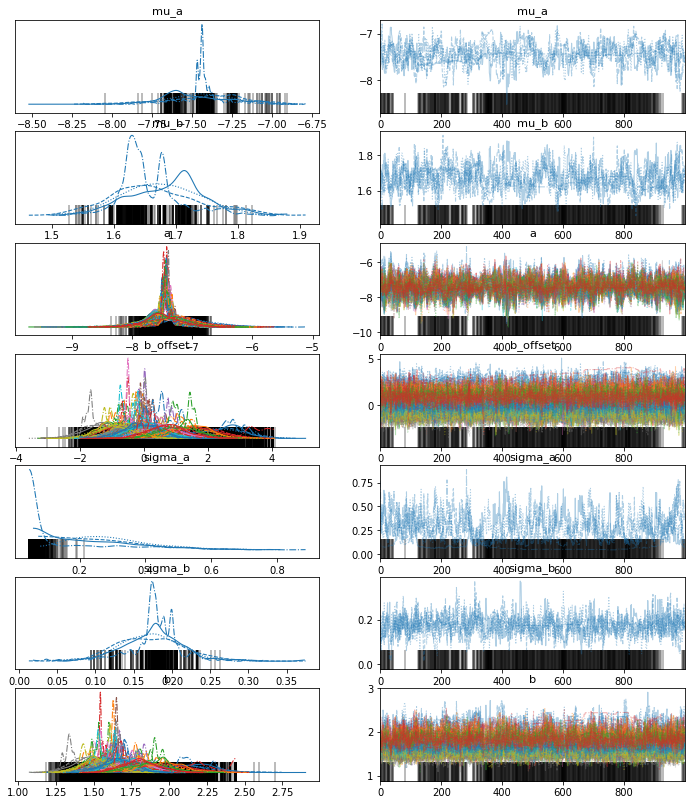

In [140]:
pm.plots.traceplot(hierarchical_trace);

In [14]:
final_master_df = pd.concat(master_df)
final_master_df.head(10)

,distribution,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,predictor
0,mu_a,-4.571,0.358,-4.946,-3.601,0.142,0.106,8.0,14.0,1.52,Age
1,mu_b,0.044,0.013,0.009,0.058,0.005,0.004,8.0,13.0,1.53,Age
2,a[1988-1989],-4.566,0.364,-4.956,-3.601,0.145,0.108,8.0,17.0,1.54,Age
3,a[1989-1990],-4.558,0.355,-4.954,-3.596,0.139,0.103,8.0,16.0,1.47,Age
4,a[1990-1991],-4.562,0.359,-4.951,-3.591,0.141,0.104,8.0,15.0,1.51,Age
5,a[1991-1992],-4.562,0.357,-4.947,-3.598,0.140,0.104,8.0,17.0,1.49,Age
6,a[1992-1993],-4.559,0.355,-4.948,-3.589,0.139,0.103,8.0,16.0,1.47,Age
7,a[1993-1994],-4.541,0.346,-4.949,-3.599,0.133,0.099,8.0,16.0,1.63,Age
8,a[1994-1995],-4.554,0.352,-4.951,-3.599,0.137,0.102,8.0,16.0,1.49,Age
9,a[1995-1996],-4.563,0.354,-4.956,-3.598,0.138,0.103,8.0,15.0,1.48,Age


In [15]:
final_master_df['significant'] = ((final_master_df["hdi_3%"] < 0) & (final_master_df["hdi_97%"] > 0)) == False
final_master_df['typeDist'] = np.where(final_master_df['distribution'].str.contains('b'), 'beta', 'intercept')
final_master_df

,distribution,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,predictor,significant,typeDist
0,mu_a,-4.571,0.358,-4.946,-3.601,0.142,0.106,8.0,14.0,1.52,Age,True,intercept
1,mu_b,0.044,0.013,0.009,0.058,0.005,0.004,8.0,13.0,1.53,Age,True,beta
2,a[1988-1989],-4.566,0.364,-4.956,-3.601,0.145,0.108,8.0,17.0,1.54,Age,True,intercept
3,a[1989-1990],-4.558,0.355,-4.954,-3.596,0.139,0.103,8.0,16.0,1.47,Age,True,intercept
4,a[1990-1991],-4.562,0.359,-4.951,-3.591,0.141,0.104,8.0,15.0,1.51,Age,True,intercept
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,b[2019-2020],1.911,0.159,1.627,2.213,0.009,0.007,301.0,906.0,1.02,VORP,True,beta
68,b[2020-2021],1.863,0.136,1.599,2.104,0.008,0.005,323.0,592.0,1.01,VORP,True,beta
69,b[2021-2022],1.804,0.125,1.565,2.029,0.006,0.004,428.0,1827.0,1.01,VORP,True,beta
70,sigma_a,0.269,0.146,0.025,0.520,0.017,0.012,45.0,32.0,1.07,VORP,True,intercept


In [16]:
season_final_master_df = final_master_df[final_master_df["distribution"].str.contains('\[')]
season_final_master_df

,distribution,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,predictor,significant,typeDist
2,a[1988-1989],-4.566,0.364,-4.956,-3.601,0.145,0.108,8.0,17.0,1.54,Age,True,intercept
3,a[1989-1990],-4.558,0.355,-4.954,-3.596,0.139,0.103,8.0,16.0,1.47,Age,True,intercept
4,a[1990-1991],-4.562,0.359,-4.951,-3.591,0.141,0.104,8.0,15.0,1.51,Age,True,intercept
5,a[1991-1992],-4.562,0.357,-4.947,-3.598,0.140,0.104,8.0,17.0,1.49,Age,True,intercept
6,a[1992-1993],-4.559,0.355,-4.948,-3.589,0.139,0.103,8.0,16.0,1.47,Age,True,intercept
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,b[2017-2018],1.688,0.110,1.479,1.895,0.004,0.003,655.0,1349.0,1.01,VORP,True,beta
66,b[2018-2019],1.662,0.107,1.463,1.863,0.004,0.003,598.0,1742.0,1.01,VORP,True,beta
67,b[2019-2020],1.911,0.159,1.627,2.213,0.009,0.007,301.0,906.0,1.02,VORP,True,beta
68,b[2020-2021],1.863,0.136,1.599,2.104,0.008,0.005,323.0,592.0,1.01,VORP,True,beta


In [17]:
final_master_df.groupby(['predictor', 'typeDist']).sum()['significant']

predictor  typeDist 
3PAr       beta         36
           intercept    36
AST%       beta         36
           intercept    36
Age        beta         36
           intercept    36
BLK%       beta         36
           intercept    36
BPM        beta         35
           intercept    36
DBPM       beta         35
           intercept    36
DRB%       beta         36
           intercept    36
DWS        beta         36
           intercept    36
FTr        beta         36
           intercept    36
G          beta         36
           intercept    36
MP         beta         34
           intercept    35
OBPM       beta         35
           intercept    36
ORB%       beta          1
           intercept    36
OWS        beta         36
           intercept    36
PER        beta         36
           intercept    36
STL%       beta         36
           intercept    36
TOV%       beta         36
           intercept    36
TRB%       beta         36
           intercept    36
TS%    

In [18]:
season_final_master_df.groupby(['predictor', 'typeDist']).sum()['significant']

predictor  typeDist 
3PAr       beta         34
           intercept    34
AST%       beta         34
           intercept    34
Age        beta         34
           intercept    34
BLK%       beta         34
           intercept    34
BPM        beta         33
           intercept    34
DBPM       beta         33
           intercept    34
DRB%       beta         34
           intercept    34
DWS        beta         34
           intercept    34
FTr        beta         34
           intercept    34
G          beta         34
           intercept    34
MP         beta         33
           intercept    34
OBPM       beta         33
           intercept    34
ORB%       beta          0
           intercept    34
OWS        beta         34
           intercept    34
PER        beta         34
           intercept    34
STL%       beta         34
           intercept    34
TOV%       beta         34
           intercept    34
TRB%       beta         34
           intercept    34
TS%    

In [23]:
season_final_master_df

,distribution,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,predictor,significant,typeDist,season
2,a[1988-1989],-4.566,0.364,-4.956,-3.601,0.145,0.108,8.0,17.0,1.54,Age,True,intercept,1988
3,a[1989-1990],-4.558,0.355,-4.954,-3.596,0.139,0.103,8.0,16.0,1.47,Age,True,intercept,1989
4,a[1990-1991],-4.562,0.359,-4.951,-3.591,0.141,0.104,8.0,15.0,1.51,Age,True,intercept,1990
5,a[1991-1992],-4.562,0.357,-4.947,-3.598,0.140,0.104,8.0,17.0,1.49,Age,True,intercept,1991
6,a[1992-1993],-4.559,0.355,-4.948,-3.589,0.139,0.103,8.0,16.0,1.47,Age,True,intercept,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,b[2017-2018],1.688,0.110,1.479,1.895,0.004,0.003,655.0,1349.0,1.01,VORP,True,beta,2017
66,b[2018-2019],1.662,0.107,1.463,1.863,0.004,0.003,598.0,1742.0,1.01,VORP,True,beta,2018
67,b[2019-2020],1.911,0.159,1.627,2.213,0.009,0.007,301.0,906.0,1.02,VORP,True,beta,2019
68,b[2020-2021],1.863,0.136,1.599,2.104,0.008,0.005,323.0,592.0,1.01,VORP,True,beta,2020


In [24]:
betas_all_predictor_master = season_final_master_df[season_final_master_df['distribution'].str.contains('\[')]
betas_all_predictor_master['season'] = betas_all_predictor_master['distribution'].str.split('\[').str[1].str.split('-').str[0]
betas_all_predictor_master = betas_all_predictor_master[betas_all_predictor_master['distribution'].str.contains('\[')]
betas_all_predictor_master

,distribution,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,predictor,significant,typeDist,season
2,a[1988-1989],-4.566,0.364,-4.956,-3.601,0.145,0.108,8.0,17.0,1.54,Age,True,intercept,1988
3,a[1989-1990],-4.558,0.355,-4.954,-3.596,0.139,0.103,8.0,16.0,1.47,Age,True,intercept,1989
4,a[1990-1991],-4.562,0.359,-4.951,-3.591,0.141,0.104,8.0,15.0,1.51,Age,True,intercept,1990
5,a[1991-1992],-4.562,0.357,-4.947,-3.598,0.140,0.104,8.0,17.0,1.49,Age,True,intercept,1991
6,a[1992-1993],-4.559,0.355,-4.948,-3.589,0.139,0.103,8.0,16.0,1.47,Age,True,intercept,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,b[2017-2018],1.688,0.110,1.479,1.895,0.004,0.003,655.0,1349.0,1.01,VORP,True,beta,2017
66,b[2018-2019],1.662,0.107,1.463,1.863,0.004,0.003,598.0,1742.0,1.01,VORP,True,beta,2018
67,b[2019-2020],1.911,0.159,1.627,2.213,0.009,0.007,301.0,906.0,1.02,VORP,True,beta,2019
68,b[2020-2021],1.863,0.136,1.599,2.104,0.008,0.005,323.0,592.0,1.01,VORP,True,beta,2020


In [26]:
betas_all_predictor_master[betas_all_predictor_master['predictor'] == 'Age']

,distribution,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,predictor,significant,typeDist,season
2,a[1988-1989],-4.566,0.364,-4.956,-3.601,0.145,0.108,8.0,17.0,1.54,Age,True,intercept,1988
3,a[1989-1990],-4.558,0.355,-4.954,-3.596,0.139,0.103,8.0,16.0,1.47,Age,True,intercept,1989
4,a[1990-1991],-4.562,0.359,-4.951,-3.591,0.141,0.104,8.0,15.0,1.51,Age,True,intercept,1990
5,a[1991-1992],-4.562,0.357,-4.947,-3.598,0.140,0.104,8.0,17.0,1.49,Age,True,intercept,1991
6,a[1992-1993],-4.559,0.355,-4.948,-3.589,0.139,0.103,8.0,16.0,1.47,Age,True,intercept,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,b[2017-2018],0.044,0.013,0.007,0.057,0.005,0.004,8.0,14.0,1.49,Age,True,beta,2017
66,b[2018-2019],0.044,0.013,0.009,0.058,0.005,0.004,8.0,14.0,1.50,Age,True,beta,2018
67,b[2019-2020],0.044,0.013,0.007,0.057,0.005,0.004,8.0,15.0,1.47,Age,True,beta,2019
68,b[2020-2021],0.044,0.013,0.008,0.059,0.005,0.004,8.0,14.0,1.47,Age,True,beta,2020


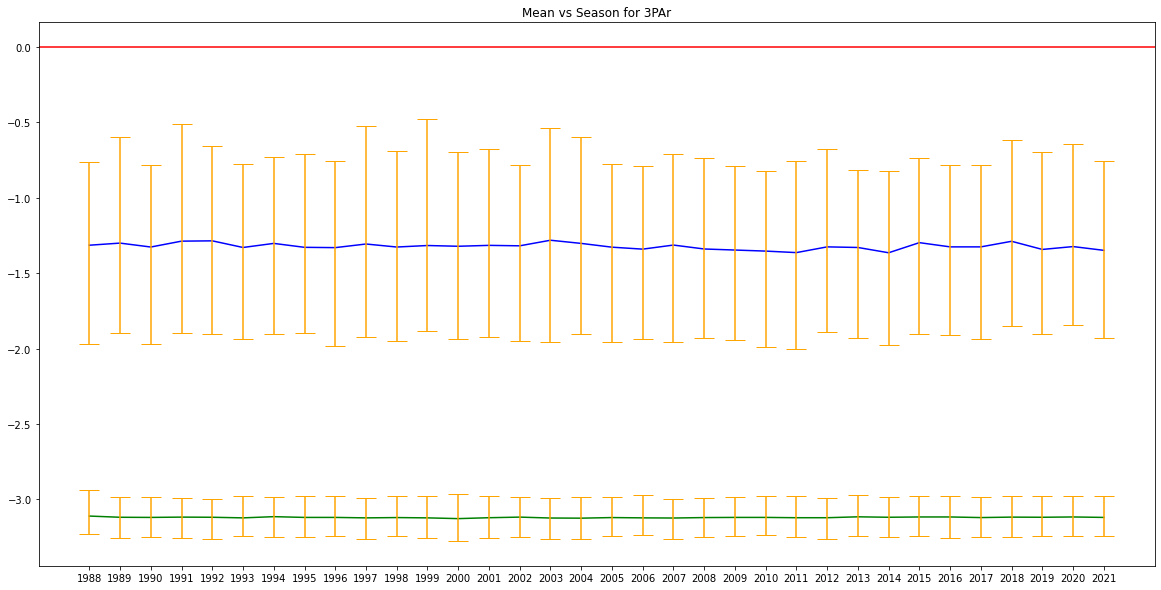

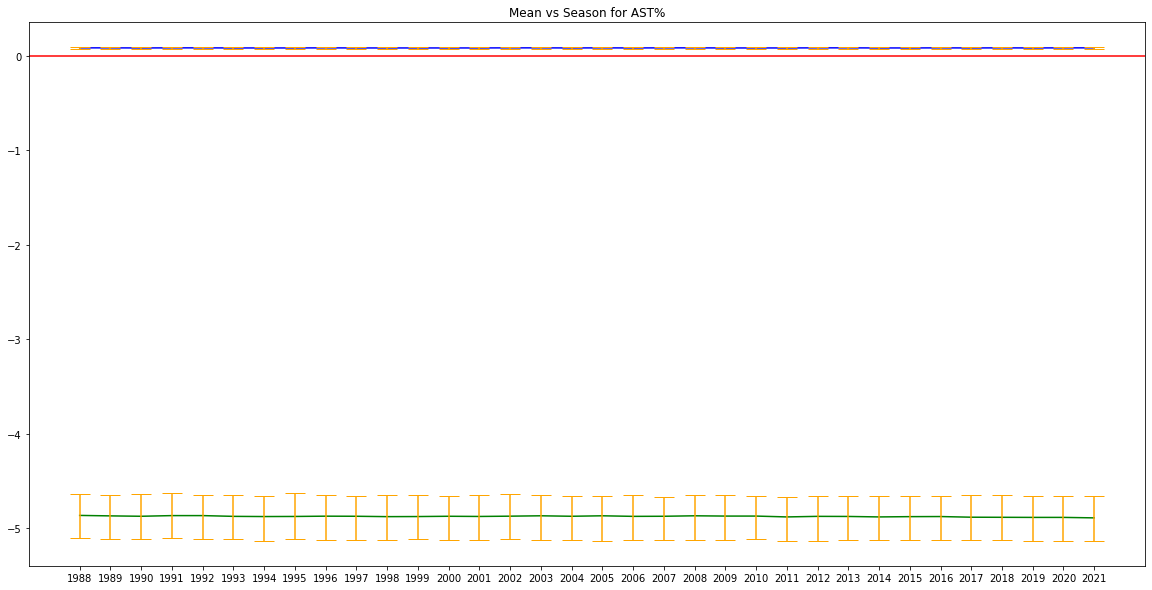

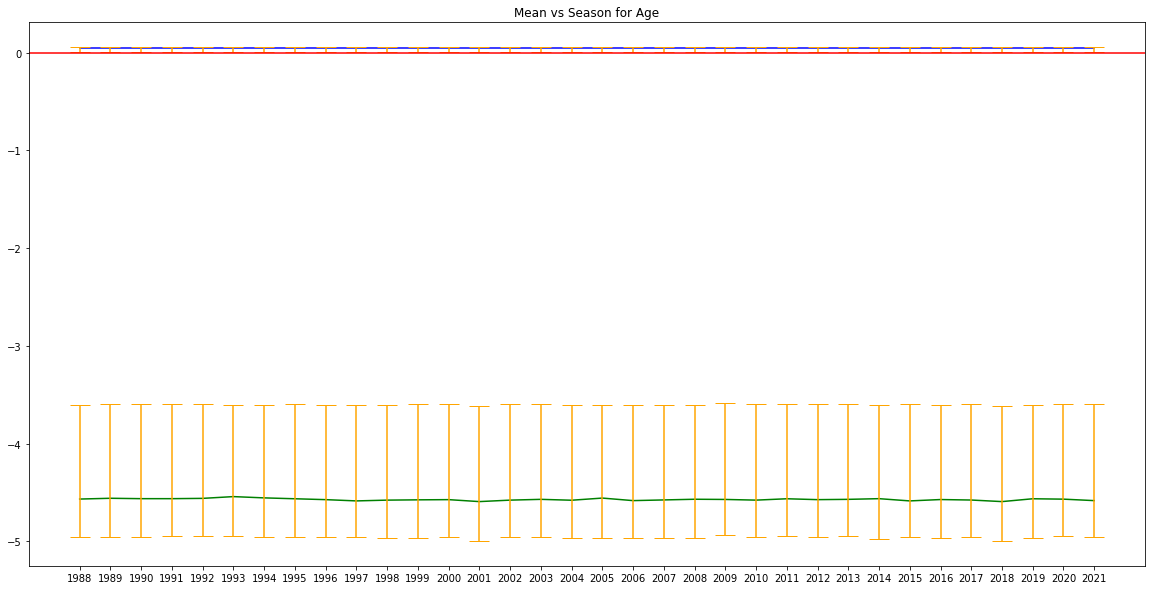

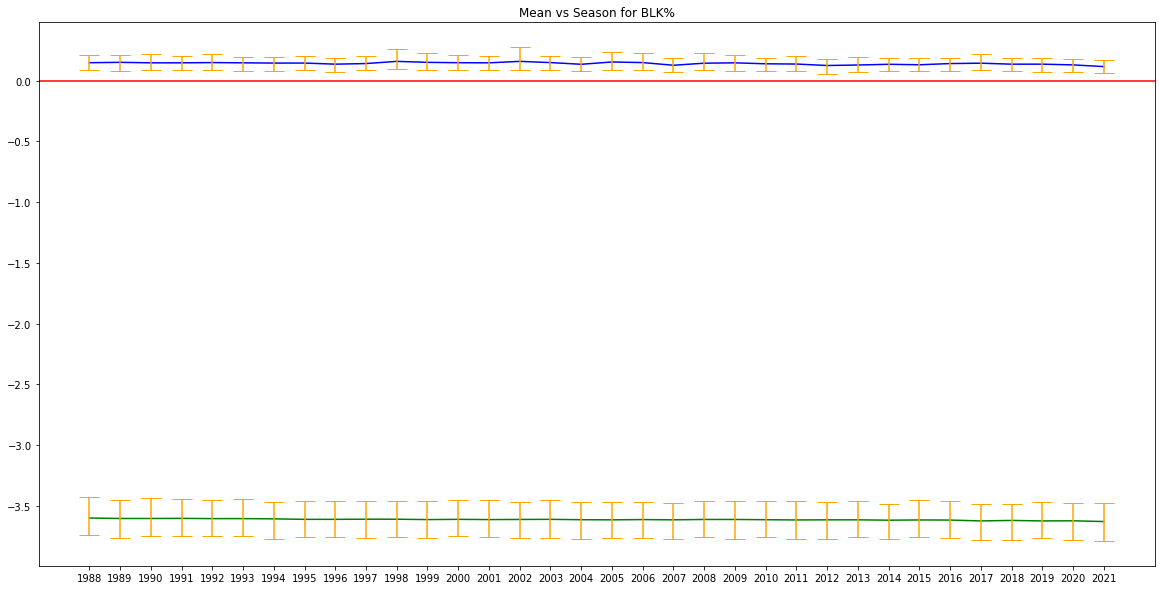

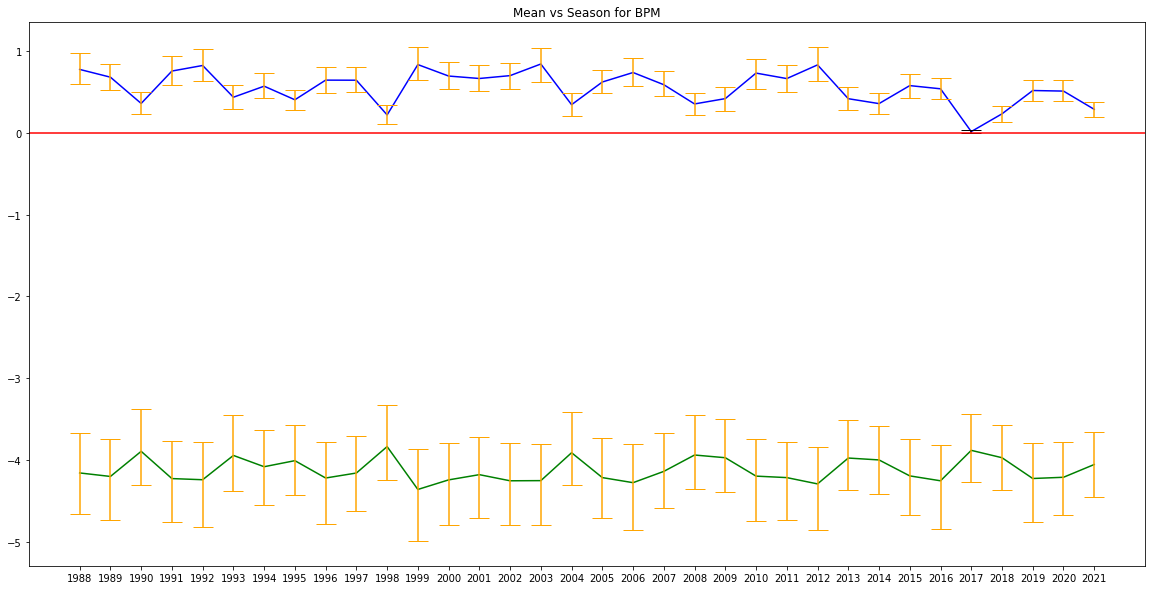

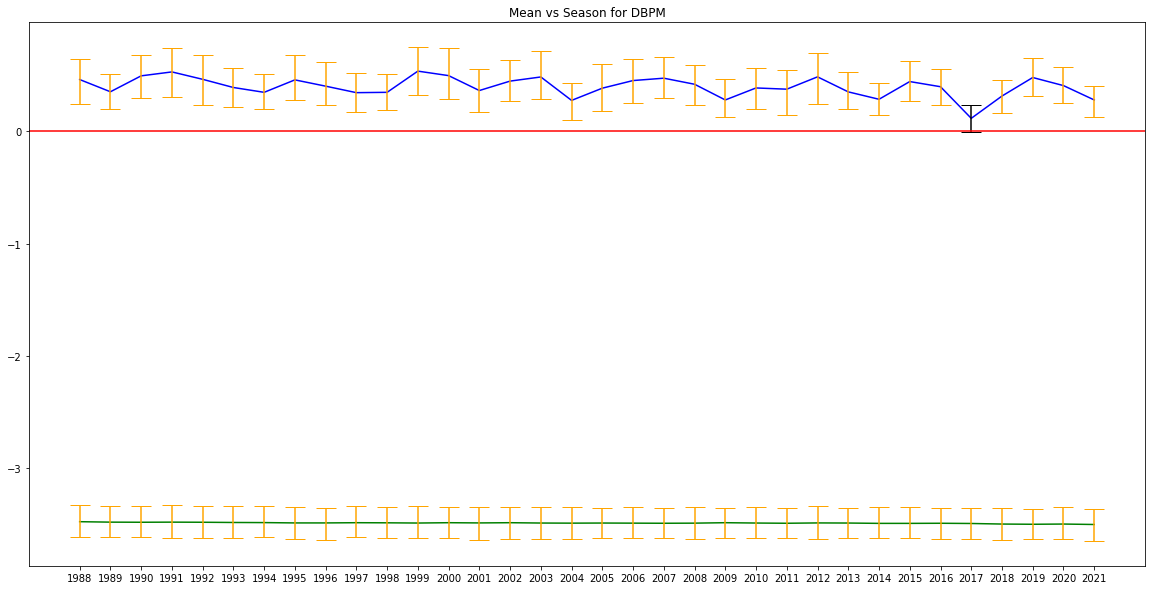

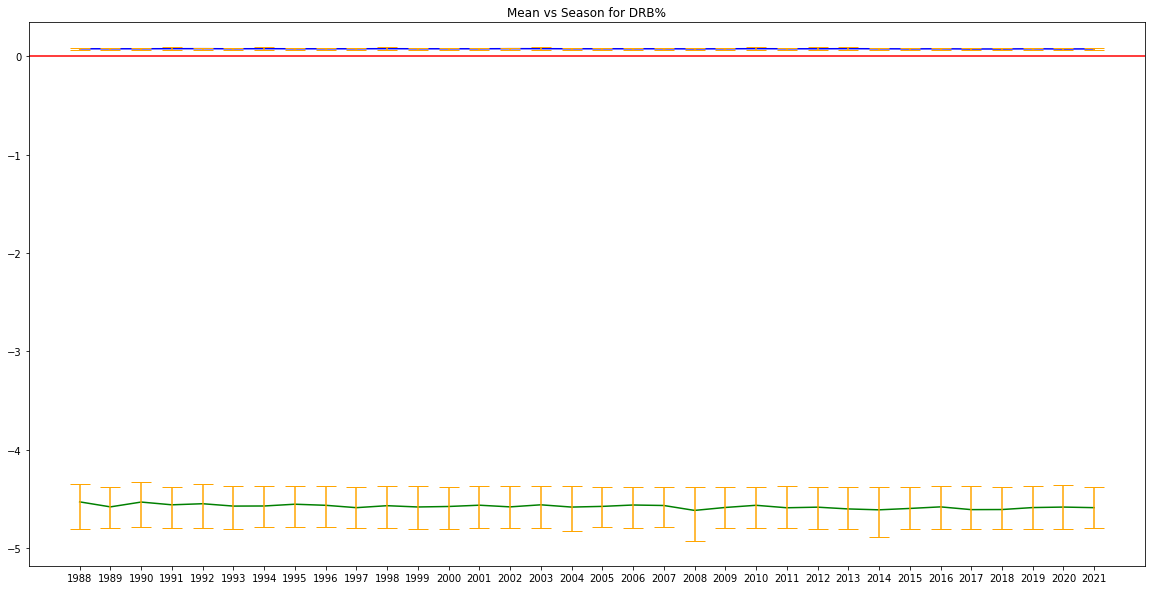

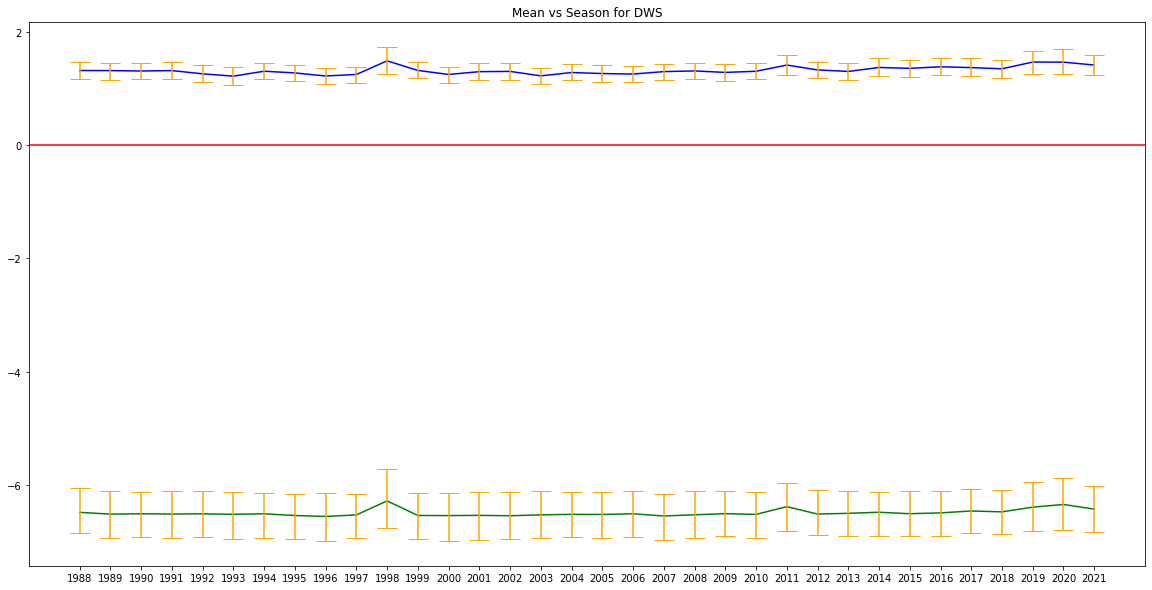

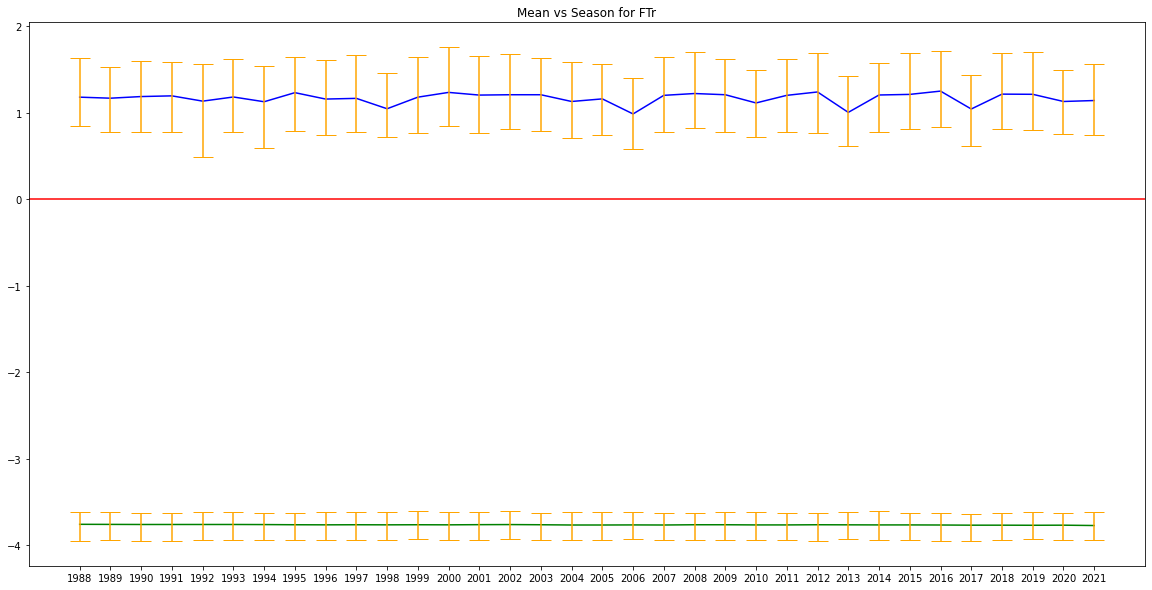

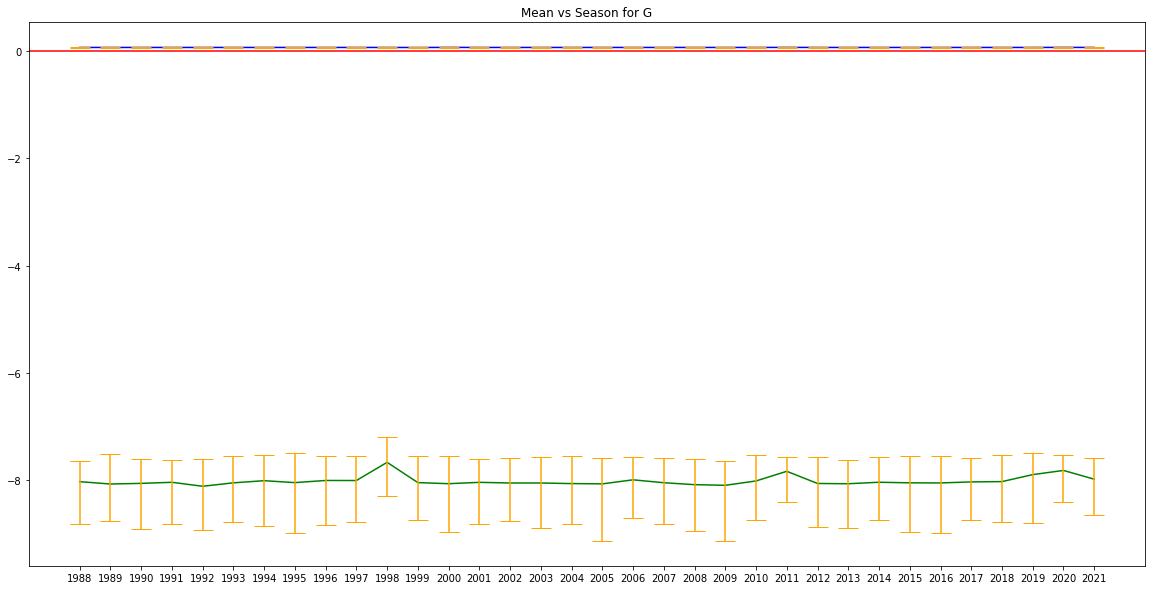

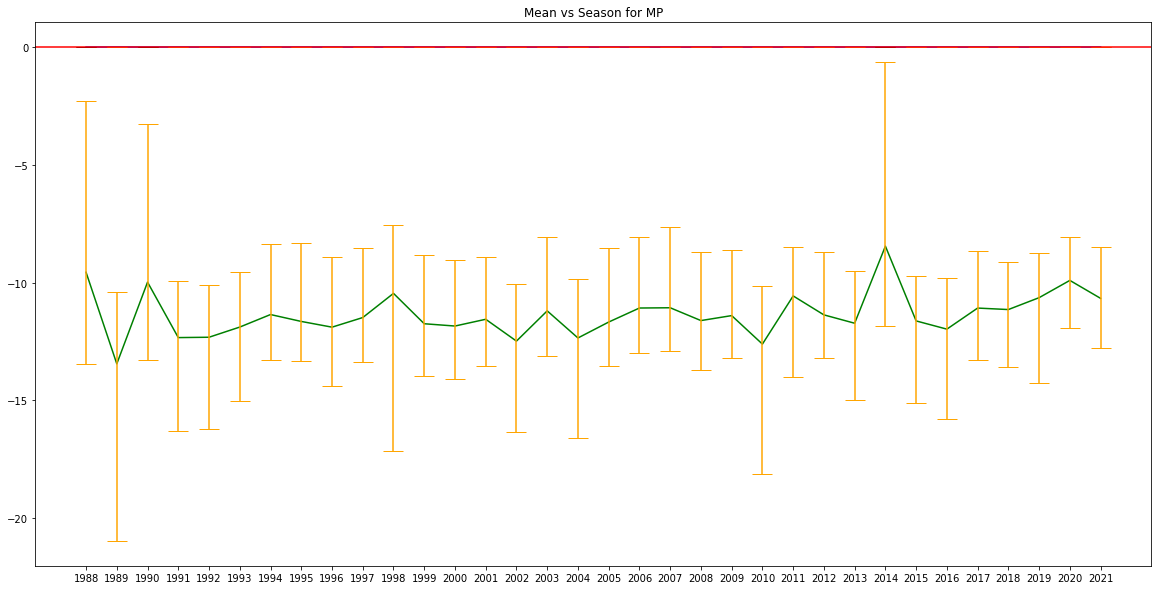

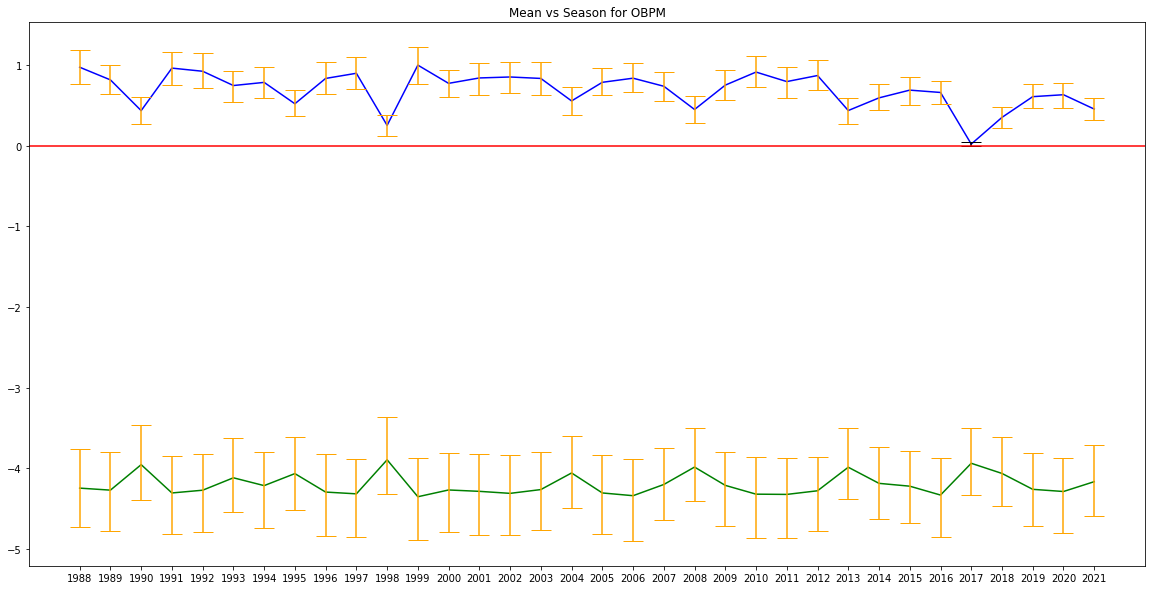

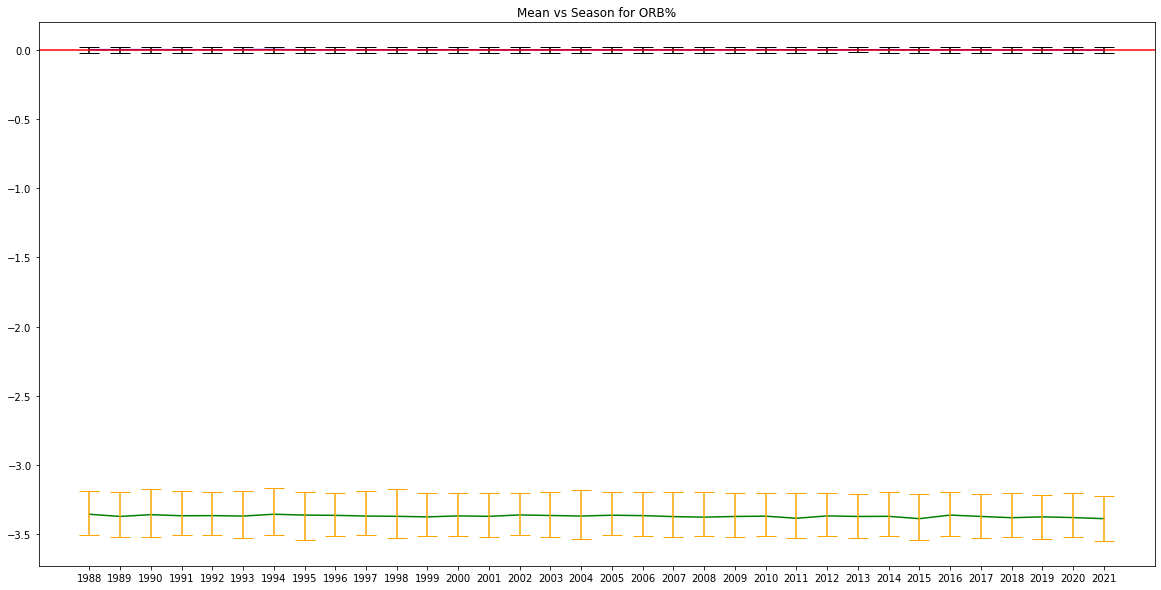

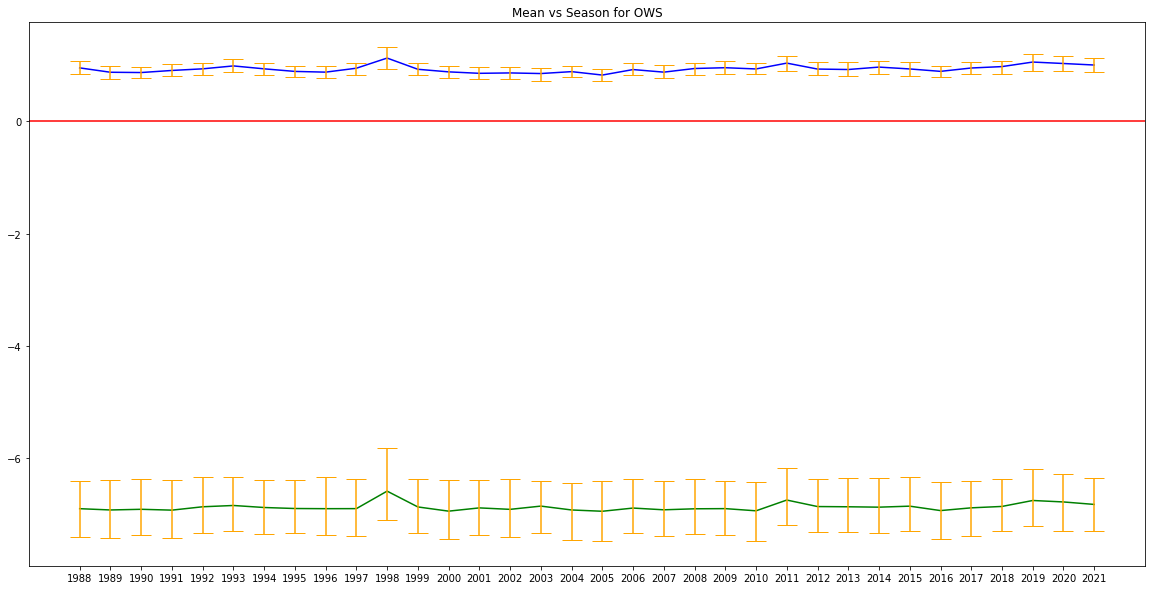

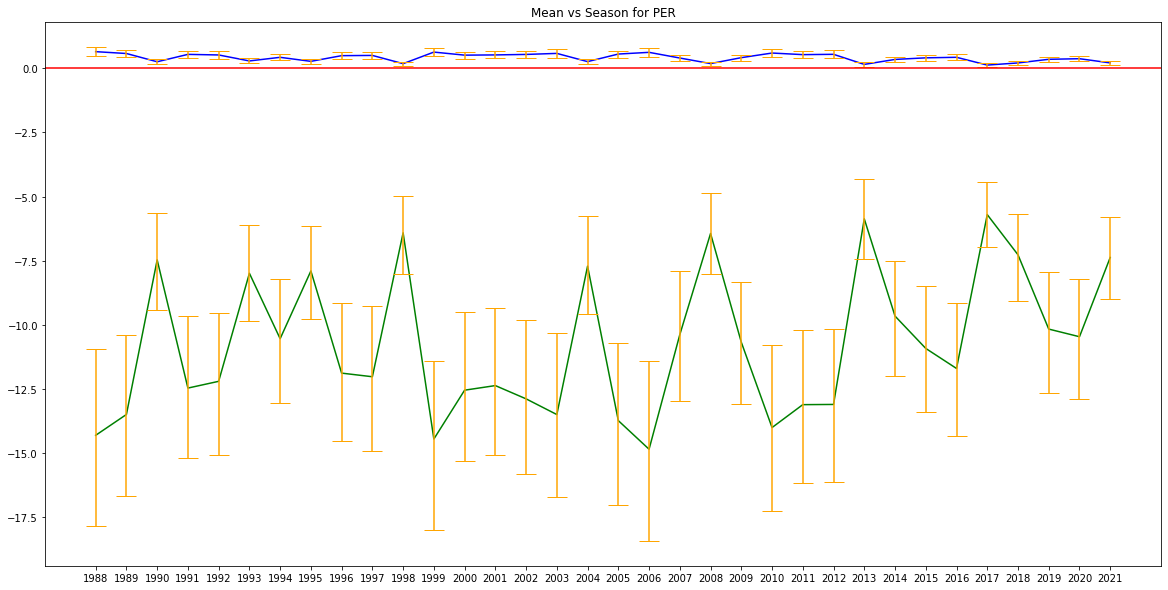

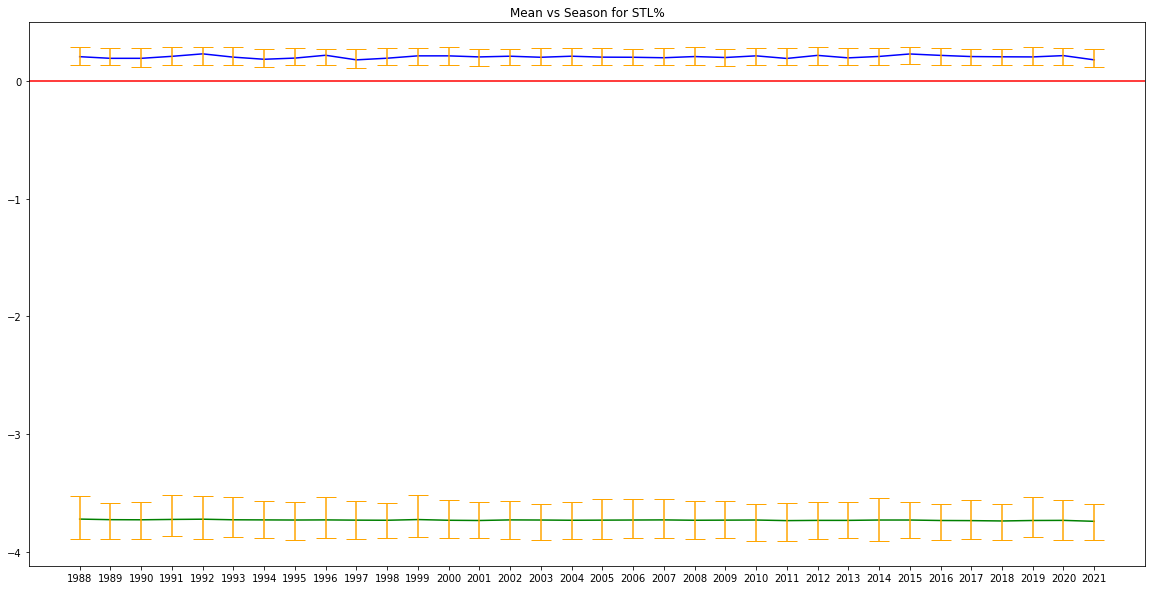

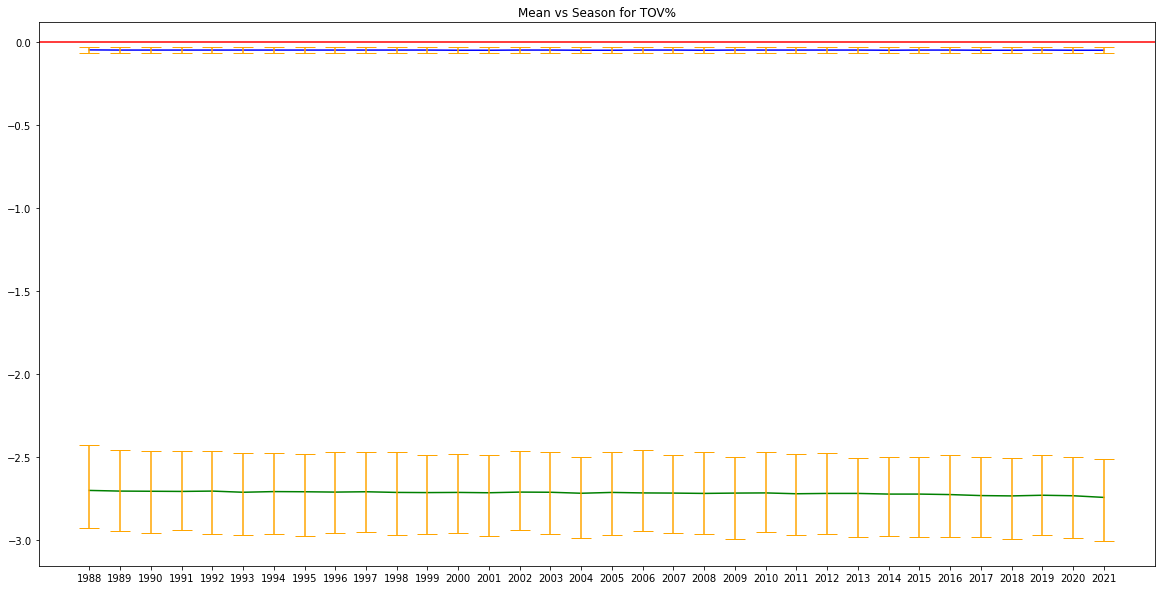

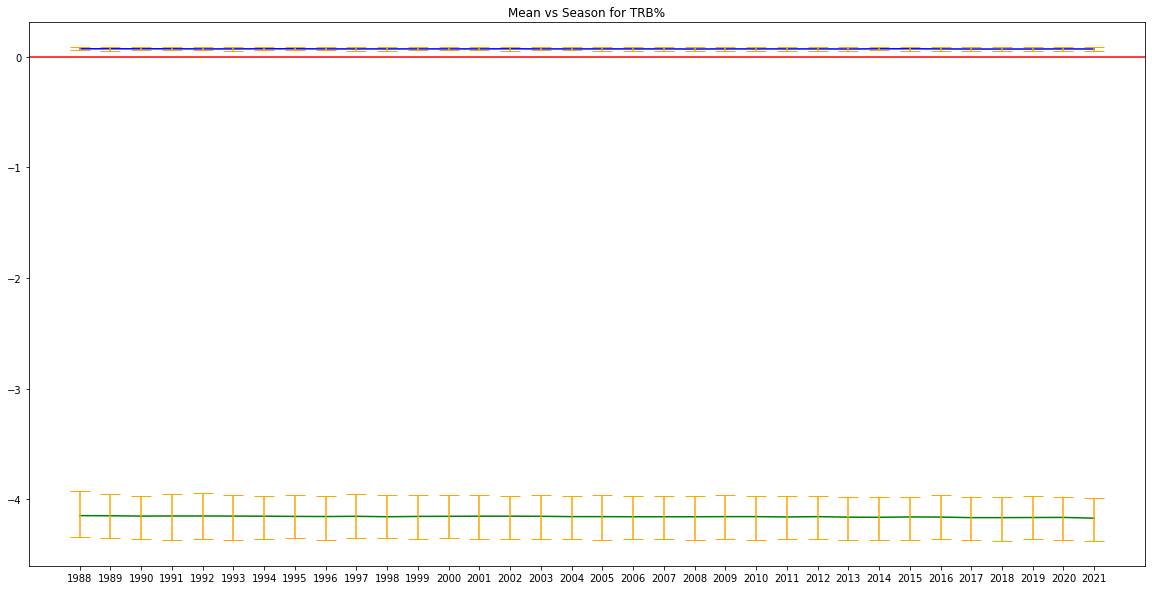

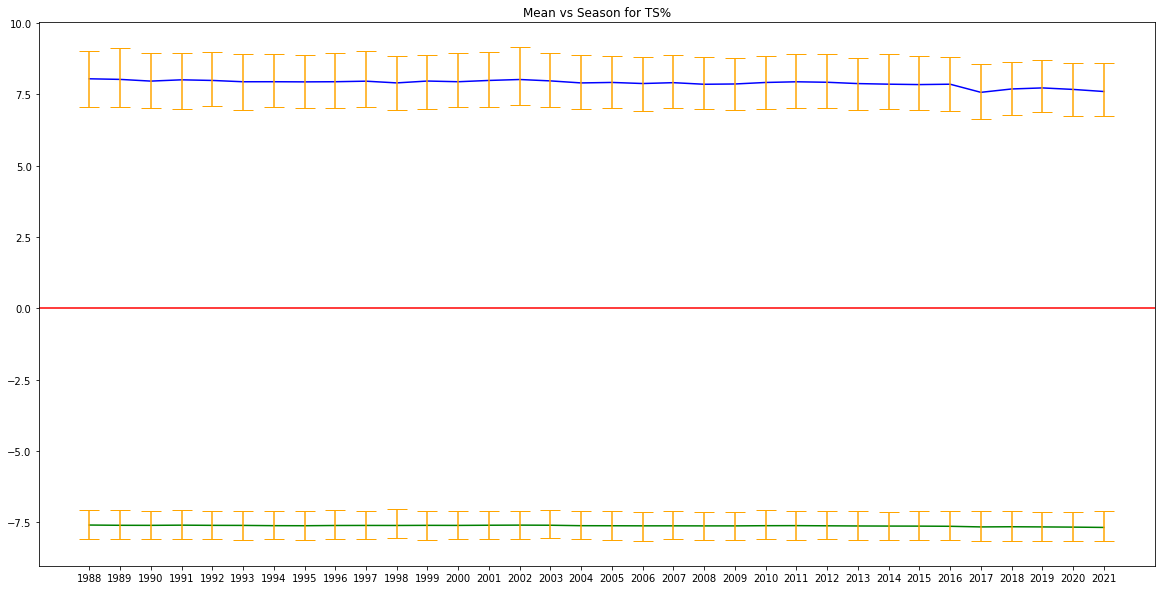

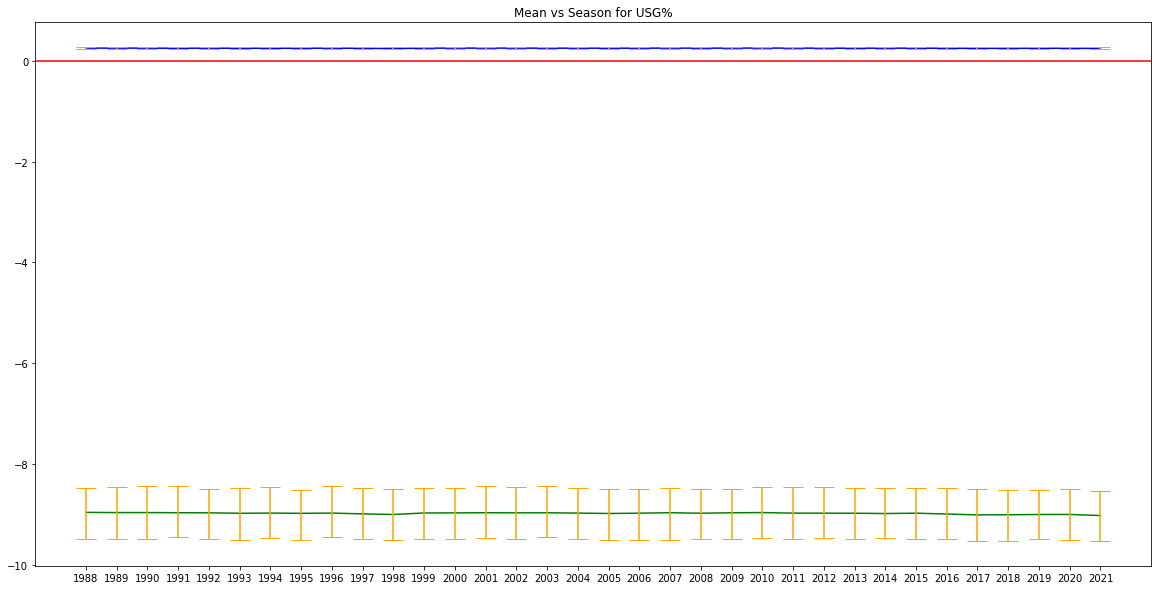

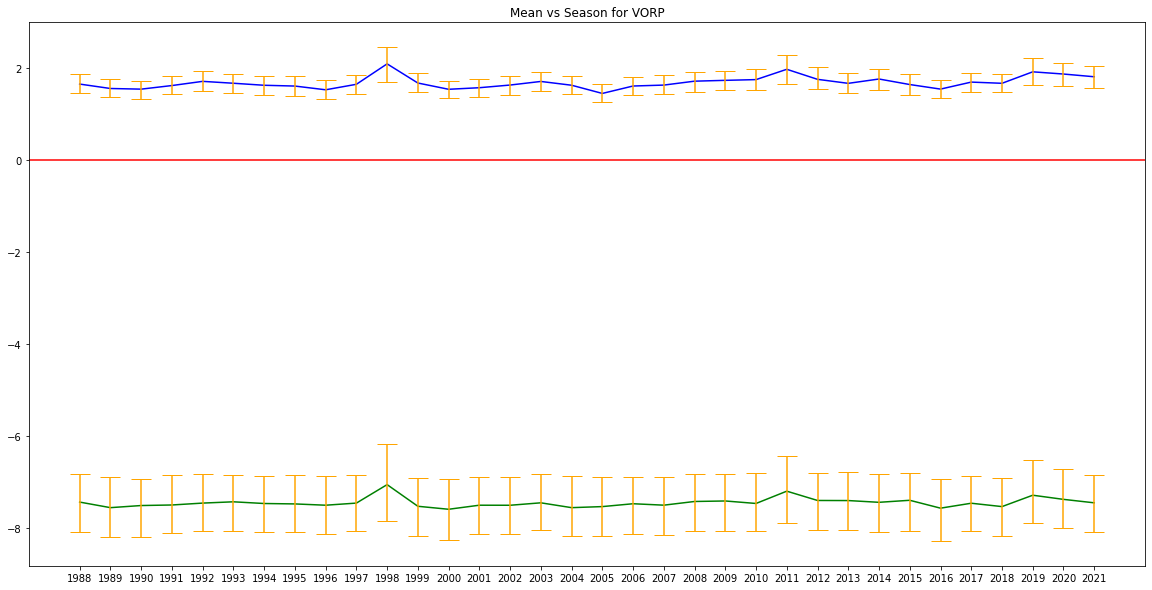

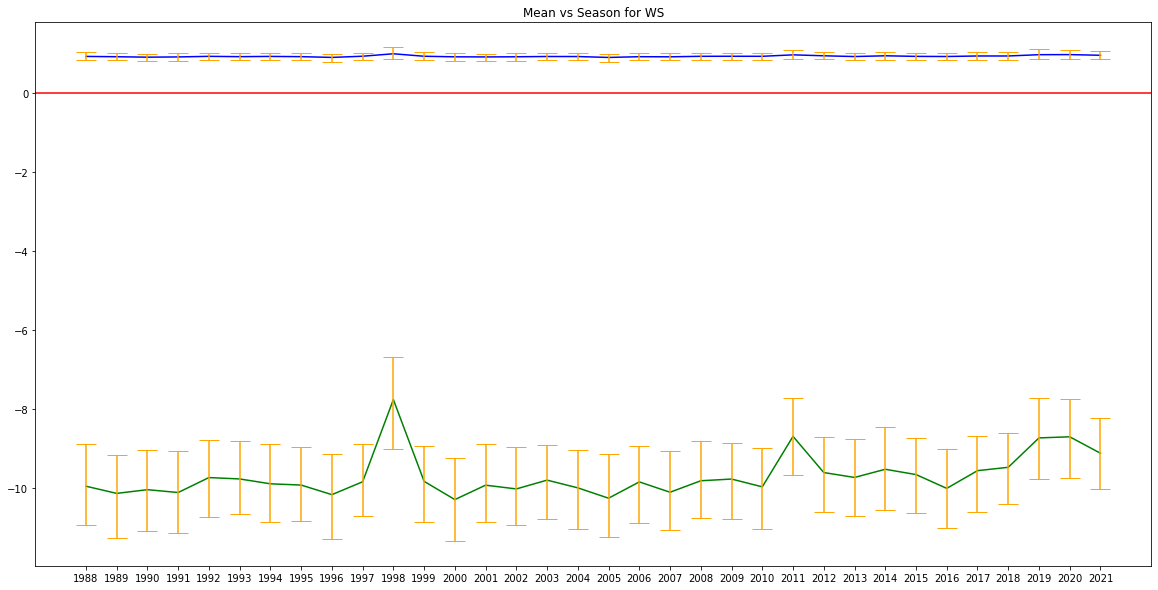

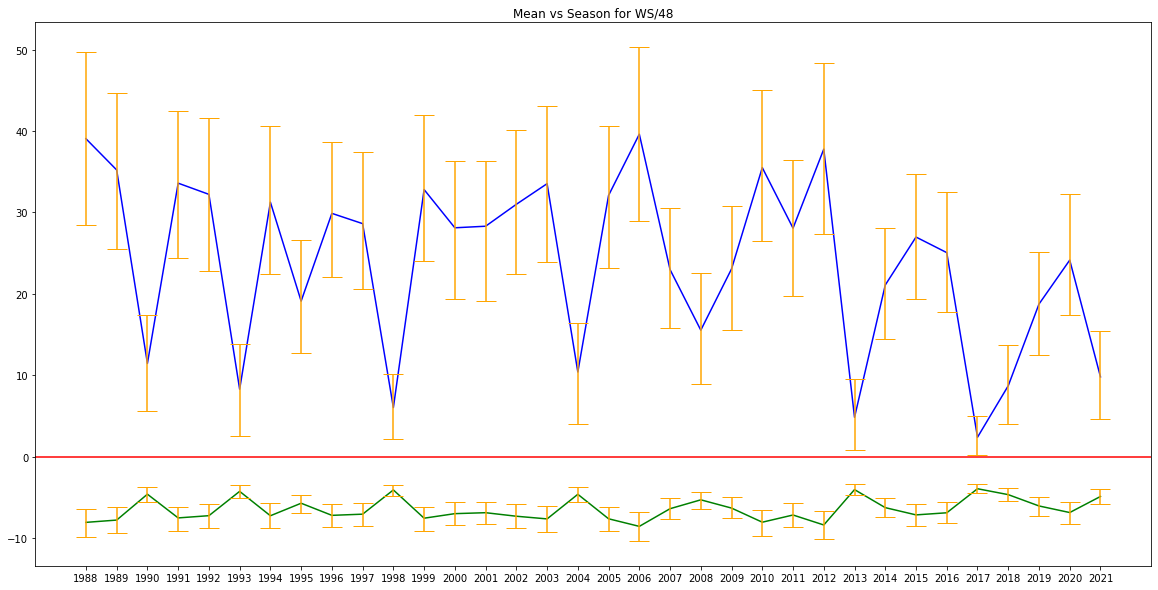

In [30]:
import warnings
warnings.filterwarnings("ignore")
for i in np.unique(season_final_master_df['predictor']):
    temp = season_final_master_df[season_final_master_df['predictor'] == i]
    below_zero = ((temp['hdi_3%'] < 0) & (temp['hdi_97%'] < 0))
    above_zero = ((temp['hdi_3%'] > 0) & (temp['hdi_97%'] > 0))
    temp['sig'] = np.where((below_zero | above_zero), True, False)
    temp1 = temp[temp['sig'] == True]
    temp2 = temp[temp['sig'] == False]
    tempA = temp[temp['distribution'].str.contains('b\[')]
    tempB = temp[temp['distribution'].str.contains('a\[')]
    plt.figure(figsize=(20,10))
    plt.plot(tempA['season'], tempA['mean'], color='blue')
    plt.plot(tempB['season'], tempB['mean'], color='green')
    plt.errorbar(temp1['season'], 
                 temp1['mean'], 
                 yerr=[temp1['mean'] - temp1['hdi_3%'], temp1['hdi_97%'] - temp1['mean']],
                 ecolor = 'orange',
                 capsize=10,linestyle='')
    plt.errorbar(temp2['season'], 
                 temp2['mean'], 
                 yerr=[temp2['mean'] - temp2['hdi_3%'], temp2['hdi_97%'] - temp2['mean']],
                 ecolor = 'black',
                 capsize=10,linestyle='')
    plt.axhline(y=0, color='red')
    plt.title('Mean vs Season for {}'.format(i))

In [67]:
!pip install graphviz

    100% |████████████████████████████████| 51kB 2.0MB/s ta 0:00:01


In [71]:
import graphviz

In [72]:
with pm.Model(coords=coords) as hierarchical_model:
    season_idx = pm.Data("season_idx", season_idxs, dims="obs_id")
    # Hyperpriors for group nodes
    mu_a = pm.Normal("mu_a", mu=0.0, sigma=10000)
    sigma_a = pm.HalfNormal("sigma_a", 5.0)

    
    # Intercept for each county, distributed around group mean mu_a
    # Above we just set mu and sd to a fixed value while here we
    # plug in a common group distribution for all a and b (which are
    # vectors of length n_counties).
    a = pm.Normal("a", mu=mu_a, sigma=sigma_a, dims="season")

    nba_est = a[season_idx]
    temp_numeric = []
    for i in numeric_col.name:
        if i != 'WS/48':
            temp_numeric.append(i)
    temp_numeric
    # for i,col in enumerate(numeric_col.name):
    for i,col in enumerate(temp_numeric):
        if col != 'WS/48':
            mu = pm.Normal("mu_b{}".format(i), mu=0.0, sigma=10000)
            sigma = pm.HalfNormal("sigma_b{}".format(i), 5.0)
            var = pm.Normal("b{}".format(i), mu=mu, sigma=sigma, dims="season")
            nba_est = nba_est + var[season_idx] * remove_nan[col].values
    
    # Data likelihood
    nba_like = pm.Bernoulli(
        "nba_like",
        # p=logistic(nba_est),
        logit_p = nba_est,
        observed=remove_nan.All_NBA_Boolean.astype(int).values
    )
    pm.model_to_graphviz(hierarchical_model)

In [60]:
len(temp_numeric)

22

In [64]:
pm.model_to_graphviz(hierarchical_model)

ImportError: This function requires the python library graphviz, along with binaries. The easiest way to install all of this is by running

	conda install -c conda-forge python-graphviz

In [32]:
with hierarchical_model:
    hierarchical_trace = pm.sample(1000, tune=1000, target_accept=0.9, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b21, sigma_b21, mu_b21, b20, sigma_b20, mu_b20, b19, sigma_b19, mu_b19, b18, sigma_b18, mu_b18, b17, sigma_b17, mu_b17, b16, sigma_b16, mu_b16, b15, sigma_b15, mu_b15, b14, sigma_b14, mu_b14, b13, sigma_b13, mu_b13, b12, sigma_b12, mu_b12, b11, sigma_b11, mu_b11, b10, sigma_b10, mu_b10, b9, sigma_b9, mu_b9, b8, sigma_b8, mu_b8, b7, sigma_b7, mu_b7, b6, sigma_b6, mu_b6, b5, sigma_b5, mu_b5, b4, sigma_b4, mu_b4, b3, sigma_b3, mu_b3, b2, sigma_b2, mu_b2, b1, sigma_b1, mu_b1, b0, sigma_b0, mu_b0, a, sigma_a, mu_a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21847 seconds.
There were 137 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 136 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 58 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.15275247511157716, but should be close to 0.9. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not conv

In [33]:
hierarchical_trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data
	> constant_data

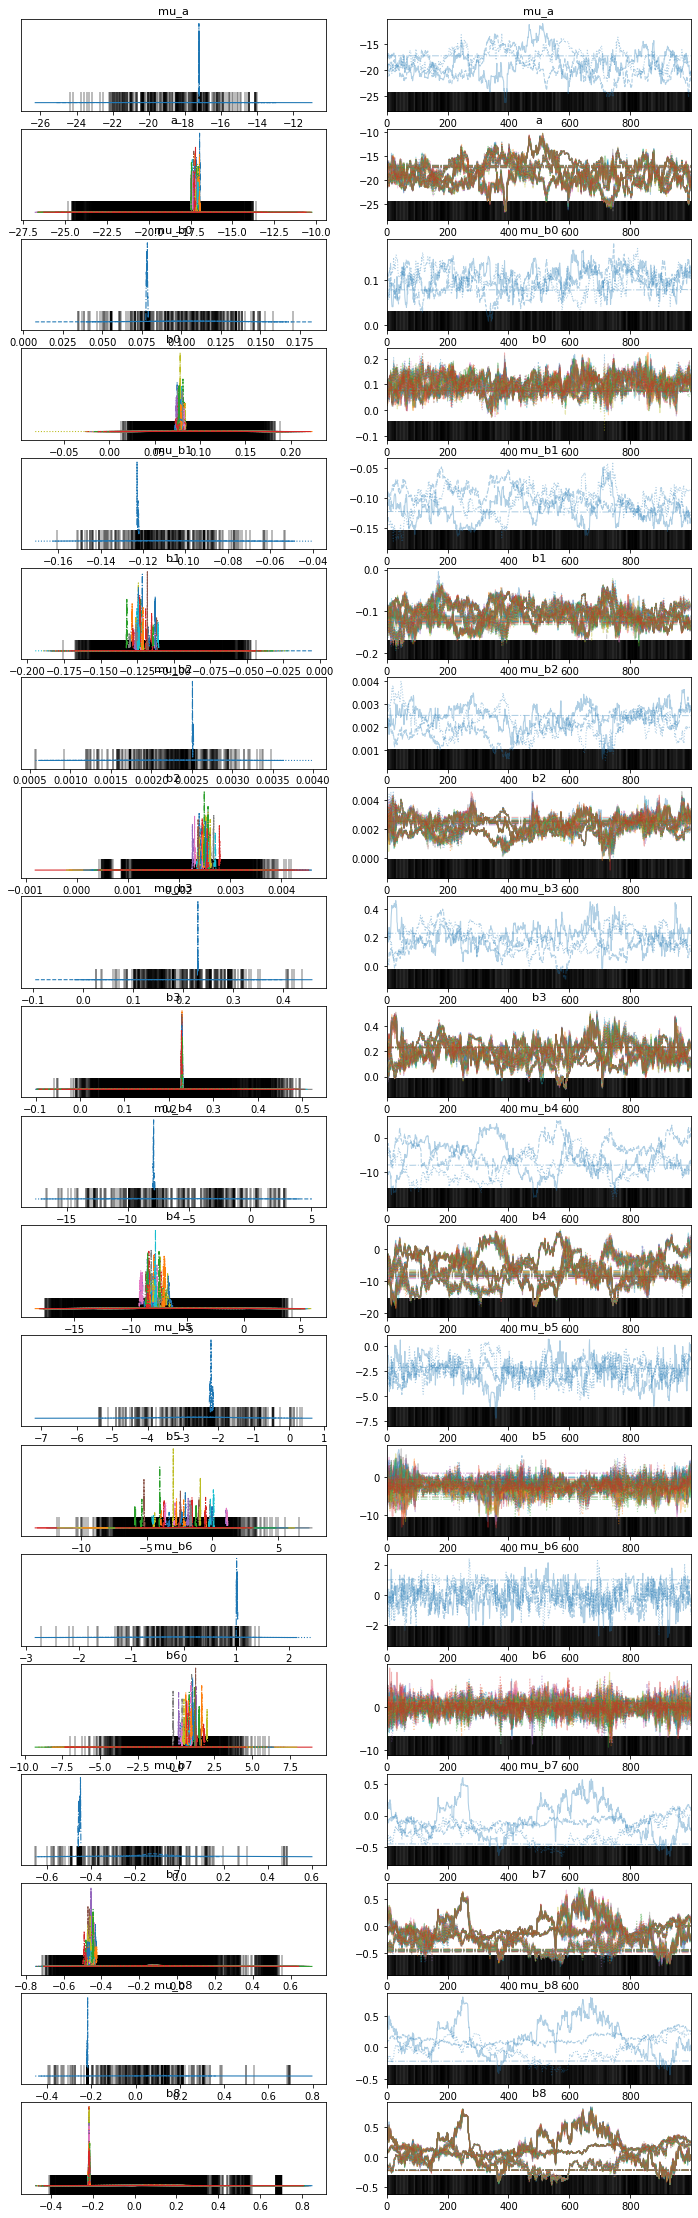

In [34]:
pm.plots.traceplot(hierarchical_trace);

In [35]:
all_predictor_df = pm.summary(hierarchical_trace).reset_index().rename(columns={"index":"distribution"})
all_predictor_df['significant'] = ((all_predictor_df["hdi_3%"] < 0) & (all_predictor_df["hdi_97%"] > 0)) == False
all_predictor_df['typeDist'] = np.where(all_predictor_df['distribution'].str.contains('b'), 'beta', 'intercept')
all_predictor_df

,distribution,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,significant,typeDist
0,mu_a,-18.278,2.162,-22.275,-14.283,0.519,0.391,19.0,71.0,1.29,True,intercept
1,a[1988-1989],-18.253,2.186,-22.534,-14.387,0.526,0.395,19.0,62.0,1.24,True,intercept
2,a[1989-1990],-18.281,2.191,-22.541,-14.343,0.518,0.390,19.0,83.0,1.29,True,intercept
3,a[1990-1991],-18.217,2.198,-22.451,-14.332,0.527,0.397,19.0,59.0,1.27,True,intercept
4,a[1991-1992],-18.293,2.183,-22.349,-14.367,0.526,0.395,18.0,81.0,1.27,True,intercept
...,...,...,...,...,...,...,...,...,...,...,...,...
823,sigma_b17,0.041,0.029,0.003,0.075,0.010,0.008,9.0,45.0,1.38,True,beta
824,sigma_b18,0.063,0.034,0.005,0.122,0.003,0.002,87.0,51.0,1.52,True,beta
825,sigma_b19,0.192,0.110,0.014,0.323,0.037,0.027,11.0,66.0,1.32,True,beta
826,sigma_b20,0.031,0.026,0.004,0.077,0.008,0.006,7.0,12.0,1.61,True,beta


In [36]:
all_predictor_df['distribution']

0              mu_a
1      a[1988-1989]
2      a[1989-1990]
3      a[1990-1991]
4      a[1991-1992]
           ...     
823       sigma_b17
824       sigma_b18
825       sigma_b19
826       sigma_b20
827       sigma_b21
Name: distribution, Length: 828, dtype: object

In [37]:
temp_numeric = []
for i in numeric_col.name:
    if i != 'WS/48':
        temp_numeric.append(i)
temp_numeric

['Age',
 'G',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP']

In [38]:
beta_hashmap = {}
# for i,col in enumerate(numeric_col.name):
for i,col in enumerate(temp_numeric):
    if col != 'WS/48':
        beta = "b"+str(i)
        beta_hashmap[beta] = col
    # something = np.where(all_predictor_df['distribution'].str.contains(beta), name, None)
beta_hashmap

{'b0': 'Age',
 'b1': 'G',
 'b2': 'MP',
 'b3': 'PER',
 'b4': 'TS%',
 'b5': '3PAr',
 'b6': 'FTr',
 'b7': 'ORB%',
 'b8': 'DRB%',
 'b9': 'TRB%',
 'b10': 'AST%',
 'b11': 'STL%',
 'b12': 'BLK%',
 'b13': 'TOV%',
 'b14': 'USG%',
 'b15': 'OWS',
 'b16': 'DWS',
 'b17': 'WS',
 'b18': 'OBPM',
 'b19': 'DBPM',
 'b20': 'BPM',
 'b21': 'VORP'}

In [39]:
def get_predictors(arr, hashmap):
    new_map = []
    for i in arr:
        predictor_name = ''
        if len(i.split('[')) == 2:
            beta_type = i.split('[')[0]
            if beta_type == 'a':
                predictor_name = 'Intercept'
            else:
                predictor_name = hashmap[beta_type]
        elif 'sigma' in i:
            beta_type = i.split('_')[1]
            if beta_type == 'a':
                # predictor_name = 'Sigma Intercept'
                predictor_name = 'Intercept'
            else:
                # predictor_name = 'Sigma ' + hashmap[beta_type] 
                predictor_name = hashmap[beta_type]
        elif 'mu' in i:
            beta_type = i.split('_')[1]
            if beta_type == 'a':
                # predictor_name = 'Mu Intercept'
                predictor_name = 'Intercept'
            else:
                # predictor_name = 'Mu ' + hashmap[beta_type]
                predictor_name = hashmap[beta_type]
        new_map.append(predictor_name)
    return new_map
all_predictor_df['predictor'] = get_predictors(all_predictor_df['distribution'],beta_hashmap)

In [40]:
all_predictor_df.groupby(['predictor', 'typeDist']).sum()['significant']

predictor  typeDist 
3PAr       beta         12
AST%       beta          1
Age        beta         36
BLK%       beta          2
BPM        beta         36
DBPM       beta         36
DRB%       beta          1
DWS        beta          1
FTr        beta          1
G          beta         36
Intercept  intercept    36
MP         beta         36
OBPM       beta         24
ORB%       beta          1
OWS        beta          1
PER        beta         36
STL%       beta          1
TOV%       beta         36
TRB%       beta          1
TS%        beta          1
USG%       beta         36
VORP       beta          1
WS         beta          1
Name: significant, dtype: int64

In [41]:
all_predictor_df[all_predictor_df['significant'] == False]

,distribution,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,significant,typeDist,predictor
175,mu_b4,-6.747,3.824,-13.401,1.473,0.997,0.719,16.0,63.0,1.67,False,beta,TS%
176,b4[1988-1989],-6.749,3.871,-13.360,1.741,1.004,0.724,16.0,60.0,1.68,False,beta,TS%
177,b4[1989-1990],-6.516,3.800,-13.420,1.579,0.952,0.686,17.0,62.0,1.64,False,beta,TS%
178,b4[1990-1991],-6.555,3.806,-14.119,0.866,0.962,0.693,16.0,63.0,1.60,False,beta,TS%
179,b4[1991-1992],-6.731,3.846,-13.620,1.288,0.978,0.705,17.0,61.0,1.66,False,beta,TS%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,b21[2017-2018],0.002,0.215,-0.373,0.450,0.037,0.026,38.0,275.0,1.09,False,beta,VORP
801,b21[2018-2019],0.132,0.217,-0.330,0.497,0.036,0.026,36.0,212.0,1.11,False,beta,VORP
802,b21[2019-2020],0.204,0.311,-0.302,0.608,0.117,0.093,9.0,114.0,1.39,False,beta,VORP
803,b21[2020-2021],0.012,0.234,-0.365,0.475,0.052,0.037,21.0,242.0,1.16,False,beta,VORP


In [42]:
np.unique(all_predictor_df[all_predictor_df['significant'] == False]['predictor'], return_counts=True)

(array(['3PAr', 'AST%', 'BLK%', 'DRB%', 'DWS', 'FTr', 'OBPM', 'ORB%',
        'OWS', 'STL%', 'TRB%', 'TS%', 'VORP', 'WS'], dtype=object),
 array([24, 35, 34, 35, 35, 35, 12, 35, 35, 35, 35, 35, 35, 35]))

In [43]:
all_predictor_df[all_predictor_df['significant'] == True]

,distribution,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,significant,typeDist,predictor
0,mu_a,-18.278,2.162,-22.275,-14.283,0.519,0.391,19.0,71.0,1.29,True,intercept,Intercept
1,a[1988-1989],-18.253,2.186,-22.534,-14.387,0.526,0.395,19.0,62.0,1.24,True,intercept,Intercept
2,a[1989-1990],-18.281,2.191,-22.541,-14.343,0.518,0.390,19.0,83.0,1.29,True,intercept,Intercept
3,a[1990-1991],-18.217,2.198,-22.451,-14.332,0.527,0.397,19.0,59.0,1.27,True,intercept,Intercept
4,a[1991-1992],-18.293,2.183,-22.349,-14.367,0.526,0.395,18.0,81.0,1.27,True,intercept,Intercept
...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,sigma_b17,0.041,0.029,0.003,0.075,0.010,0.008,9.0,45.0,1.38,True,beta,WS
824,sigma_b18,0.063,0.034,0.005,0.122,0.003,0.002,87.0,51.0,1.52,True,beta,OBPM
825,sigma_b19,0.192,0.110,0.014,0.323,0.037,0.027,11.0,66.0,1.32,True,beta,DBPM
826,sigma_b20,0.031,0.026,0.004,0.077,0.008,0.006,7.0,12.0,1.61,True,beta,BPM


In [44]:
np.unique(all_predictor_df[all_predictor_df['significant'] == True]['predictor'], return_counts=True)

(array(['3PAr', 'AST%', 'Age', 'BLK%', 'BPM', 'DBPM', 'DRB%', 'DWS', 'FTr',
        'G', 'Intercept', 'MP', 'OBPM', 'ORB%', 'OWS', 'PER', 'STL%',
        'TOV%', 'TRB%', 'TS%', 'USG%', 'VORP', 'WS'], dtype=object),
 array([12,  1, 36,  2, 36, 36,  1,  1,  1, 36, 36, 36, 24,  1,  1, 36,  1,
        36,  1,  1, 36,  1,  1]))

In [45]:
all_predictor_df[(all_predictor_df['significant'] == True) & (all_predictor_df['predictor'] == 'Age')]

,distribution,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,significant,typeDist,predictor
35,mu_b0,0.094,0.025,0.055,0.146,0.006,0.004,21.0,66.0,1.16,True,beta,Age
36,b0[1988-1989],0.093,0.028,0.050,0.154,0.007,0.005,21.0,136.0,1.14,True,beta,Age
37,b0[1989-1990],0.094,0.028,0.045,0.148,0.005,0.004,30.0,167.0,1.12,True,beta,Age
38,b0[1990-1991],0.096,0.028,0.053,0.155,0.007,0.005,20.0,91.0,1.16,True,beta,Age
39,b0[1991-1992],0.094,0.027,0.045,0.150,0.005,0.004,29.0,210.0,1.17,True,beta,Age
40,b0[1992-1993],0.096,0.028,0.050,0.149,0.007,0.005,18.0,78.0,1.17,True,beta,Age
41,b0[1993-1994],0.095,0.028,0.047,0.152,0.006,0.004,22.0,242.0,1.14,True,beta,Age
42,b0[1994-1995],0.095,0.029,0.051,0.157,0.007,0.005,19.0,114.0,1.16,True,beta,Age
43,b0[1995-1996],0.093,0.028,0.047,0.150,0.006,0.005,23.0,158.0,1.14,True,beta,Age
44,b0[1996-1997],0.095,0.027,0.050,0.151,0.005,0.004,27.0,88.0,1.22,True,beta,Age


In [46]:
all_predictor_df[(all_predictor_df['significant'] == False) & (all_predictor_df['predictor'] == 'Age')]

,distribution,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,significant,typeDist,predictor


In [47]:
all_predictor_df[(all_predictor_df['significant'] == True) & (all_predictor_df['predictor'] == '3PAr')]

,distribution,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,significant,typeDist,predictor
210,mu_b5,-2.431,0.942,-4.328,-0.578,0.093,0.070,102.0,167.0,1.49,True,beta,3PAr
212,b5[1989-1990],-3.074,1.502,-5.611,-0.079,0.245,0.175,30.0,307.0,1.10,True,beta,3PAr
219,b5[1996-1997],-3.263,1.520,-5.654,-0.303,0.346,0.248,18.0,160.0,1.16,True,beta,3PAr
221,b5[1998-1999],-2.428,1.285,-5.163,-0.038,0.096,0.106,182.0,303.0,1.49,True,beta,3PAr
223,b5[2000-2001],-3.509,1.957,-6.026,-0.160,0.699,0.566,9.0,140.0,1.36,True,beta,3PAr
233,b5[2010-2011],-3.048,1.411,-5.152,-0.031,0.289,0.207,24.0,283.0,1.12,True,beta,3PAr
234,b5[2011-2012],-2.674,1.399,-5.503,-0.102,0.109,0.094,166.0,222.0,1.51,True,beta,3PAr
235,b5[2012-2013],-2.639,1.420,-5.642,-0.220,0.244,0.179,39.0,129.0,1.12,True,beta,3PAr
237,b5[2014-2015],-2.814,1.332,-5.445,-0.148,0.099,0.074,172.0,133.0,1.53,True,beta,3PAr
239,b5[2016-2017],-2.416,1.658,-5.829,-0.244,0.446,0.322,13.0,220.0,1.22,True,beta,3PAr


In [48]:
all_predictor_df[(all_predictor_df['significant'] == False) & (all_predictor_df['predictor'] == '3PAr')]

,distribution,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,significant,typeDist,predictor
211,b5[1988-1989],-2.619,1.489,-5.135,0.154,0.170,0.121,55.0,165.0,1.13,False,beta,3PAr
213,b5[1990-1991],-3.483,1.830,-5.701,0.110,0.566,0.412,12.0,171.0,1.25,False,beta,3PAr
214,b5[1991-1992],-2.015,1.385,-4.645,0.597,0.107,0.145,98.0,353.0,1.22,False,beta,3PAr
215,b5[1992-1993],-1.250,1.933,-4.429,1.128,0.684,0.503,9.0,147.0,1.35,False,beta,3PAr
216,b5[1993-1994],-2.858,1.928,-5.225,0.360,0.691,0.595,8.0,80.0,1.44,False,beta,3PAr
217,b5[1994-1995],-1.540,1.986,-4.442,1.175,0.776,0.575,7.0,30.0,1.52,False,beta,3PAr
218,b5[1995-1996],-1.987,1.390,-4.723,0.682,0.104,0.110,141.0,188.0,1.46,False,beta,3PAr
220,b5[1997-1998],-1.614,1.671,-4.825,0.612,0.501,0.364,13.0,195.0,1.23,False,beta,3PAr
222,b5[1999-2000],-1.942,1.562,-5.055,0.269,0.409,0.295,14.0,147.0,1.20,False,beta,3PAr
224,b5[2001-2002],-2.813,1.414,-5.143,0.196,0.243,0.173,30.0,199.0,1.09,False,beta,3PAr


In [49]:
all_predictor_df[(all_predictor_df['significant'] == True) & (all_predictor_df['predictor'] == 'DWS')]

,distribution,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,significant,typeDist,predictor
822,sigma_b16,0.141,0.118,0.009,0.344,0.043,0.032,7.0,41.0,1.61,True,beta,DWS


In [50]:
all_predictor_df[(all_predictor_df['significant'] == False) & (all_predictor_df['predictor'] == 'DWS')]

,distribution,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,significant,typeDist,predictor
595,mu_b16,0.918,1.154,-0.745,2.514,0.545,0.423,5.0,16.0,2.38,False,beta,DWS
596,b16[1988-1989],0.898,1.167,-0.823,2.505,0.548,0.426,5.0,13.0,2.39,False,beta,DWS
597,b16[1989-1990],0.916,1.164,-0.778,2.520,0.545,0.423,5.0,14.0,2.37,False,beta,DWS
598,b16[1990-1991],0.929,1.159,-0.744,2.526,0.543,0.422,5.0,14.0,2.34,False,beta,DWS
599,b16[1991-1992],0.885,1.190,-0.873,2.527,0.561,0.434,5.0,13.0,2.52,False,beta,DWS
600,b16[1992-1993],0.847,1.198,-0.929,2.503,0.566,0.438,5.0,14.0,2.38,False,beta,DWS
601,b16[1993-1994],0.749,1.263,-1.154,2.510,0.599,0.462,5.0,12.0,2.50,False,beta,DWS
602,b16[1994-1995],0.844,1.197,-0.921,2.493,0.564,0.438,5.0,15.0,2.37,False,beta,DWS
603,b16[1995-1996],0.855,1.207,-0.925,2.547,0.571,0.442,5.0,13.0,2.36,False,beta,DWS
604,b16[1996-1997],0.797,1.237,-1.027,2.534,0.588,0.456,5.0,13.0,2.43,False,beta,DWS


In [51]:
all_predictor_df[(all_predictor_df['significant'] == True) & (all_predictor_df['predictor'] == 'VORP')]

,distribution,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,significant,typeDist,predictor
827,sigma_b21,0.168,0.087,0.012,0.294,0.017,0.012,45.0,118.0,1.1,True,beta,VORP


In [52]:
all_predictor_df.groupby(['predictor','significant']).count()

distribution  mean  sd  hdi_3%  hdi_97%  mcse_mean  \
predictor significant                                                       
3PAr      False                  24    24  24      24       24         24   
          True                   12    12  12      12       12         12   
AST%      False                  35    35  35      35       35         35   
          True                    1     1   1       1        1          1   
Age       True                   36    36  36      36       36         36   
BLK%      False                  34    34  34      34       34         34   
          True                    2     2   2       2        2          2   
BPM       True                   36    36  36      36       36         36   
DBPM      True                   36    36  36      36       36         36   
DRB%      False                  35    35  35      35       35         35   
          True                    1     1   1       1        1          1   
DWS       False                  35    35  35      35       35         35   
          True                    1     1   1       1        1          1   
FTr       False                  35    35  35      35       35         35   
          True                    1     1   1       1        1          1   
G         True                   36    36  36      36       36         36   
Intercept True                   36    36  36      36       36         36   
MP        True                   36    36  36      36       36         36   
OBPM      False                  12    12  12      12       12         12   
          True                   24    24  24      24       24         24   
ORB%      False                  35    35  35      35       35         35   
          True                    1     1   1       1        1          1   
OWS       False                  35    35  35      35       35         35   
          True                    1     1   1       1        1          1   
PER       True                   36    36  36      36       36         36   
STL%      False                  35    35  35      35       35         35   
          True                    1     1   1       1        1          1   
TOV%      True                   36    36  36      36       36         36   
TRB%      False                  35    35  35      35       35         35   
          True                    1     1   1       1        1          1   
TS%       False                  35    35  35      35       35         35   
          True                    1     1   1       1        1          1   
USG%      True                   36    36  36      36       36         36   
VORP      False                  35    35  35      35       35         35   
          True                    1     1   1       1        1          1   
WS        False                  35    35  35      35       35         35   
          True                    1     1   1       1        1          1   

                       mcse_sd  ess_bulk  ess_tail  r_hat  typeDist  
predictor significant                                                
3PAr      False             24        24        24     24        24  
          True              12        12        12     12        12  
AST%      False             35        35        35     35        35  
          True               1         1         1      1         1  
Age       True              36        36        36     36        36  
BLK%      False             34        34        34     34        34  
          True               2         2         2      2         2  
BPM       True              36        36        36     36        36  
DBPM      True              36        36        36     36        36  
DRB%      False             35        35        35     35        35  
          True               1         1         1      1         1  
DWS       False             35        35        35     35        35  
          True               1         

In [53]:
all_predictor_df[(all_predictor_df['significant'] == True) & (all_predictor_df['predictor'] == 'G')]

,distribution,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,significant,typeDist,predictor
70,mu_b1,-0.111,0.021,-0.150,-0.070,0.006,0.004,14.0,99.0,1.27,True,beta,G
71,b1[1988-1989],-0.109,0.021,-0.152,-0.068,0.005,0.004,18.0,123.0,1.62,True,beta,G
72,b1[1989-1990],-0.112,0.022,-0.151,-0.070,0.006,0.004,15.0,110.0,1.26,True,beta,G
73,b1[1990-1991],-0.111,0.022,-0.150,-0.067,0.006,0.004,14.0,97.0,1.27,True,beta,G
74,b1[1991-1992],-0.109,0.021,-0.150,-0.068,0.005,0.004,20.0,116.0,1.59,True,beta,G
75,b1[1992-1993],-0.110,0.022,-0.150,-0.068,0.006,0.004,15.0,71.0,1.25,True,beta,G
76,b1[1993-1994],-0.107,0.020,-0.151,-0.068,0.005,0.003,21.0,109.0,1.62,True,beta,G
77,b1[1994-1995],-0.111,0.021,-0.150,-0.068,0.006,0.004,15.0,88.0,1.25,True,beta,G
78,b1[1995-1996],-0.111,0.022,-0.150,-0.068,0.006,0.004,14.0,104.0,1.28,True,beta,G
79,b1[1996-1997],-0.112,0.022,-0.152,-0.068,0.006,0.004,16.0,103.0,1.25,True,beta,G


In [54]:
all_predictor_df[all_predictor_df['predictor'] == 'MP']

,distribution,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,significant,typeDist,predictor
105,mu_b2,0.002,0.001,0.001,0.003,0.0,0.0,15.0,91.0,1.42,True,beta,MP
106,b2[1988-1989],0.002,0.001,0.001,0.003,0.0,0.0,15.0,89.0,1.63,True,beta,MP
107,b2[1989-1990],0.002,0.001,0.001,0.003,0.0,0.0,17.0,99.0,1.59,True,beta,MP
108,b2[1990-1991],0.002,0.001,0.001,0.003,0.0,0.0,16.0,84.0,1.57,True,beta,MP
109,b2[1991-1992],0.002,0.001,0.001,0.003,0.0,0.0,15.0,105.0,1.50,True,beta,MP
110,b2[1992-1993],0.002,0.001,0.001,0.003,0.0,0.0,15.0,73.0,1.63,True,beta,MP
111,b2[1993-1994],0.002,0.001,0.001,0.003,0.0,0.0,15.0,91.0,1.63,True,beta,MP
112,b2[1994-1995],0.002,0.001,0.001,0.003,0.0,0.0,16.0,106.0,1.64,True,beta,MP
113,b2[1995-1996],0.002,0.001,0.001,0.003,0.0,0.0,13.0,106.0,1.27,True,beta,MP
114,b2[1996-1997],0.002,0.001,0.001,0.003,0.0,0.0,16.0,97.0,1.62,True,beta,MP


In [55]:
all_predictor_df[(all_predictor_df['significant'] == True) & (all_predictor_df['predictor'] == 'USG%')]

,distribution,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,significant,typeDist,predictor
525,mu_b14,0.194,0.031,0.145,0.260,0.007,0.005,21.0,163.0,1.15,True,beta,USG%
526,b14[1988-1989],0.194,0.035,0.140,0.270,0.009,0.006,17.0,182.0,1.17,True,beta,USG%
527,b14[1989-1990],0.195,0.033,0.134,0.261,0.006,0.004,41.0,209.0,1.09,True,beta,USG%
528,b14[1990-1991],0.199,0.035,0.142,0.270,0.007,0.005,23.0,158.0,1.13,True,beta,USG%
529,b14[1991-1992],0.193,0.033,0.134,0.261,0.006,0.004,38.0,193.0,1.10,True,beta,USG%
530,b14[1992-1993],0.197,0.034,0.143,0.270,0.008,0.006,21.0,208.0,1.14,True,beta,USG%
531,b14[1993-1994],0.196,0.035,0.142,0.268,0.009,0.006,17.0,175.0,1.17,True,beta,USG%
532,b14[1994-1995],0.191,0.034,0.131,0.261,0.008,0.006,22.0,212.0,1.14,True,beta,USG%
533,b14[1995-1996],0.194,0.035,0.136,0.262,0.009,0.006,17.0,213.0,1.17,True,beta,USG%
534,b14[1996-1997],0.196,0.034,0.140,0.264,0.007,0.005,25.0,154.0,1.13,True,beta,USG%


In [56]:
all_predictor_df[all_predictor_df['distribution'].str.contains('sigma') == False].sort_values('mean',ascending=False).head(20)

,distribution,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,significant,typeDist,predictor
746,b20[1998-1999],2.001,1.562,0.140,4.898,0.630,0.468,6.0,25.0,1.79,True,beta,BPM
739,b20[1991-1992],1.998,1.559,0.142,4.884,0.628,0.467,6.0,21.0,1.76,True,beta,BPM
751,b20[2003-2004],1.996,1.559,0.132,4.878,0.628,0.467,6.0,37.0,1.76,True,beta,BPM
747,b20[1999-2000],1.995,1.558,0.138,4.878,0.628,0.467,6.0,19.0,1.76,True,beta,BPM
736,b20[1988-1989],1.995,1.557,0.146,4.893,0.627,0.466,6.0,36.0,1.72,True,beta,BPM
767,b20[2019-2020],1.995,1.560,0.137,4.878,0.629,0.468,6.0,27.0,1.77,True,beta,BPM
757,b20[2009-2010],1.994,1.557,0.142,4.884,0.627,0.466,6.0,20.0,1.75,True,beta,BPM
760,b20[2012-2013],1.992,1.558,0.139,4.874,0.627,0.466,6.0,20.0,1.77,True,beta,BPM
740,b20[1992-1993],1.992,1.558,0.142,4.876,0.627,0.466,6.0,47.0,1.73,True,beta,BPM
755,b20[2007-2008],1.992,1.558,0.142,4.893,0.627,0.466,6.0,42.0,1.74,True,beta,BPM


In [57]:
all_predictor_df[all_predictor_df['predictor'] == 'WS']

,distribution,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,significant,typeDist,predictor
630,mu_b17,0.793,1.088,-0.649,2.466,0.513,0.389,5.0,15.0,2.43,False,beta,WS
631,b17[1988-1989],0.775,1.115,-0.737,2.433,0.527,0.400,5.0,13.0,2.57,False,beta,WS
632,b17[1989-1990],0.777,1.108,-0.713,2.457,0.524,0.398,5.0,14.0,2.46,False,beta,WS
633,b17[1990-1991],0.779,1.101,-0.698,2.445,0.520,0.395,5.0,14.0,2.48,False,beta,WS
634,b17[1991-1992],0.772,1.121,-0.762,2.443,0.530,0.403,5.0,12.0,2.62,False,beta,WS
635,b17[1992-1993],0.805,1.075,-0.619,2.484,0.506,0.384,5.0,15.0,2.37,False,beta,WS
636,b17[1993-1994],0.771,1.112,-0.724,2.436,0.525,0.399,5.0,12.0,2.53,False,beta,WS
637,b17[1994-1995],0.808,1.076,-0.623,2.476,0.507,0.384,5.0,14.0,2.36,False,beta,WS
638,b17[1995-1996],0.809,1.066,-0.624,2.471,0.501,0.380,5.0,14.0,2.41,False,beta,WS
639,b17[1996-1997],0.785,1.088,-0.659,2.456,0.513,0.389,5.0,14.0,2.48,False,beta,WS


In [58]:
betas_all_predictor = all_predictor_df[all_predictor_df['distribution'].str.contains('\[')]
betas_all_predictor['season'] = betas_all_predictor['distribution'].str.split('\[').str[1].str.split('-').str[0]
betas_all_predictor

,distribution,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,significant,typeDist,predictor,season
1,a[1988-1989],-18.253,2.186,-22.534,-14.387,0.526,0.395,19.0,62.0,1.24,True,intercept,Intercept,1988
2,a[1989-1990],-18.281,2.191,-22.541,-14.343,0.518,0.390,19.0,83.0,1.29,True,intercept,Intercept,1989
3,a[1990-1991],-18.217,2.198,-22.451,-14.332,0.527,0.397,19.0,59.0,1.27,True,intercept,Intercept,1990
4,a[1991-1992],-18.293,2.183,-22.349,-14.367,0.526,0.395,18.0,81.0,1.27,True,intercept,Intercept,1991
5,a[1992-1993],-18.216,2.184,-22.177,-14.073,0.511,0.386,20.0,73.0,1.31,True,intercept,Intercept,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,b21[2017-2018],0.002,0.215,-0.373,0.450,0.037,0.026,38.0,275.0,1.09,False,beta,VORP,2017
801,b21[2018-2019],0.132,0.217,-0.330,0.497,0.036,0.026,36.0,212.0,1.11,False,beta,VORP,2018
802,b21[2019-2020],0.204,0.311,-0.302,0.608,0.117,0.093,9.0,114.0,1.39,False,beta,VORP,2019
803,b21[2020-2021],0.012,0.234,-0.365,0.475,0.052,0.037,21.0,242.0,1.16,False,beta,VORP,2020


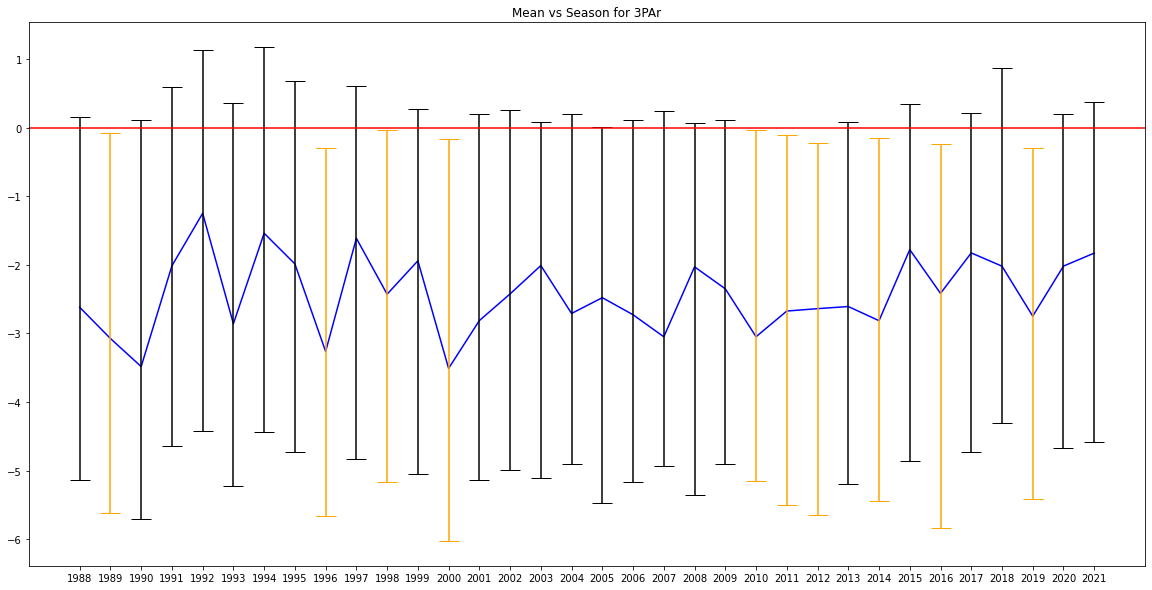

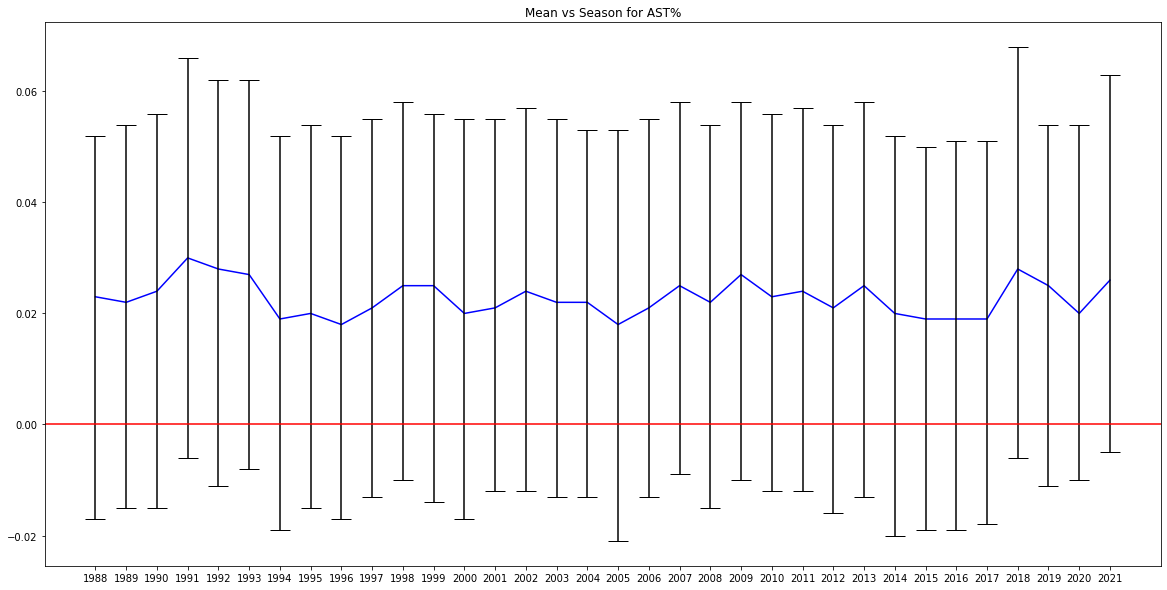

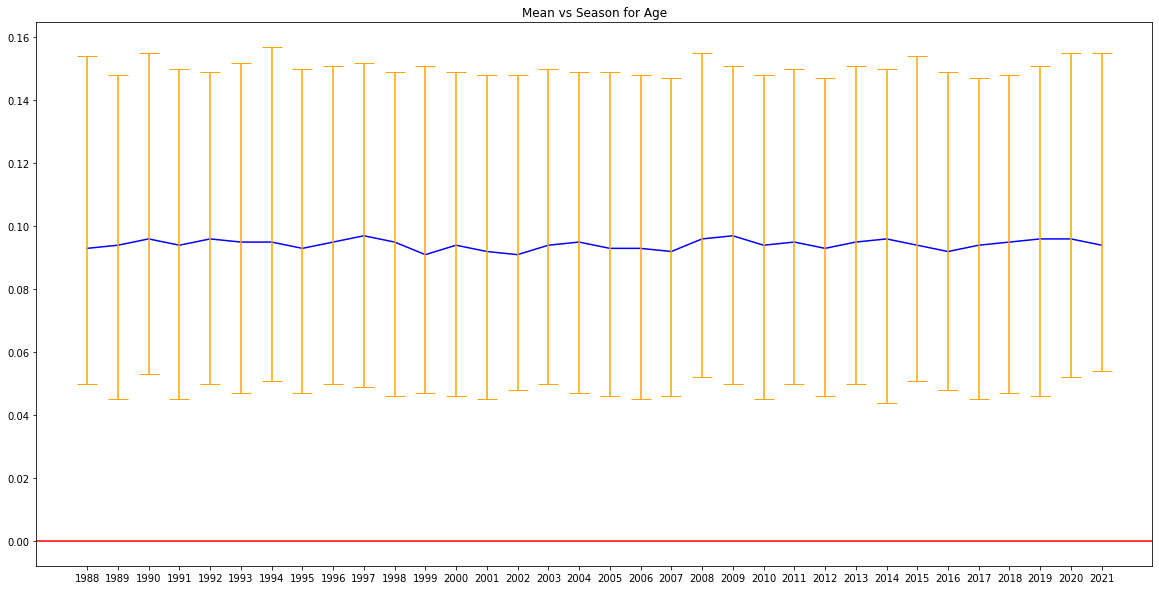

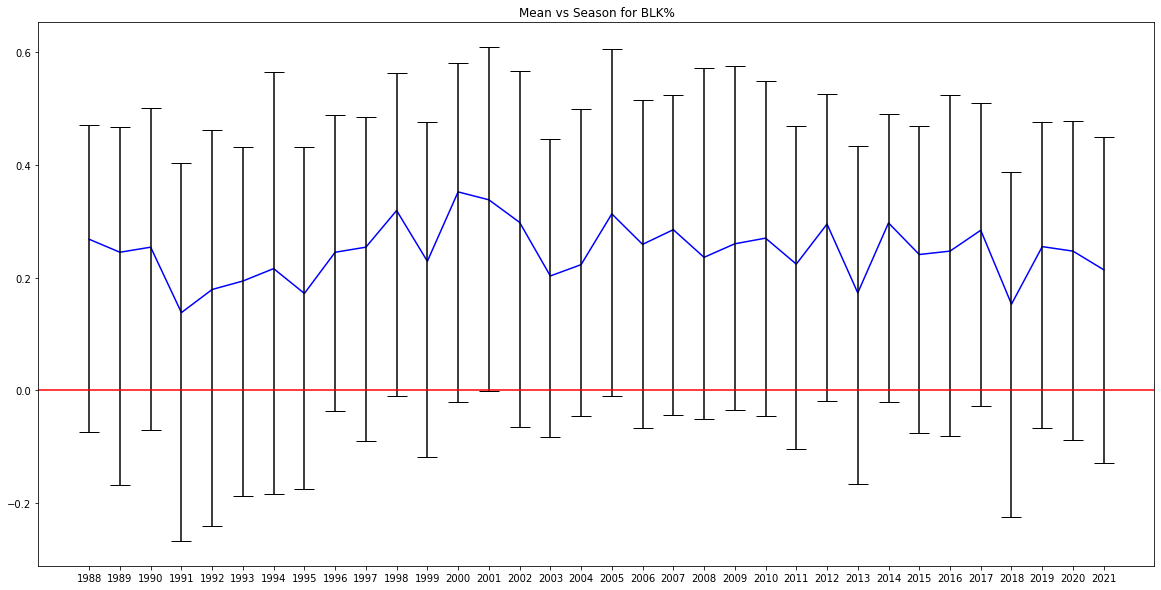

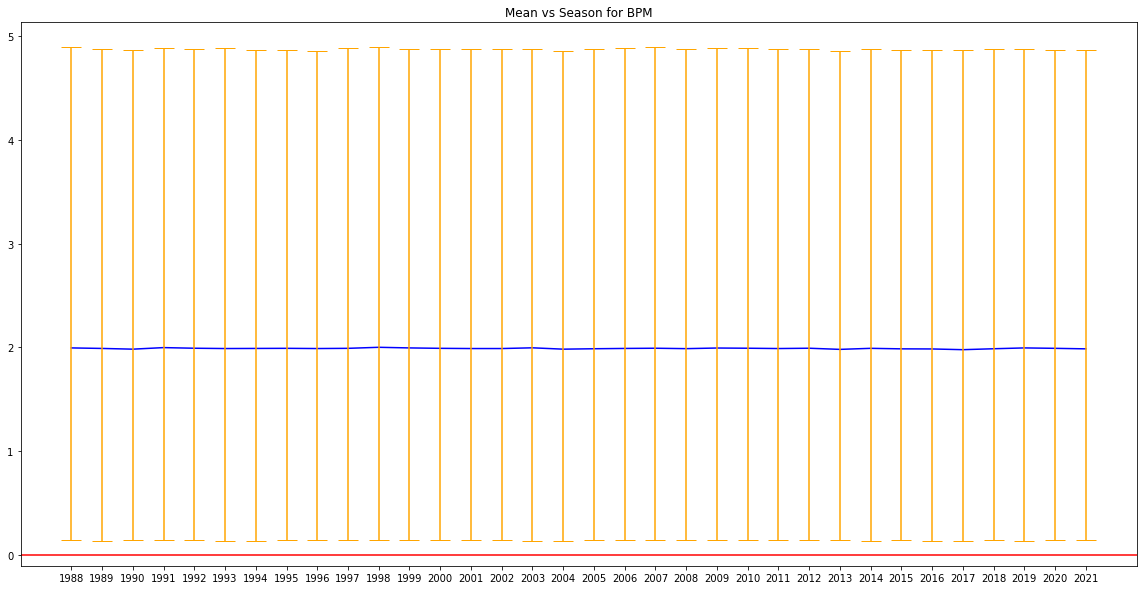

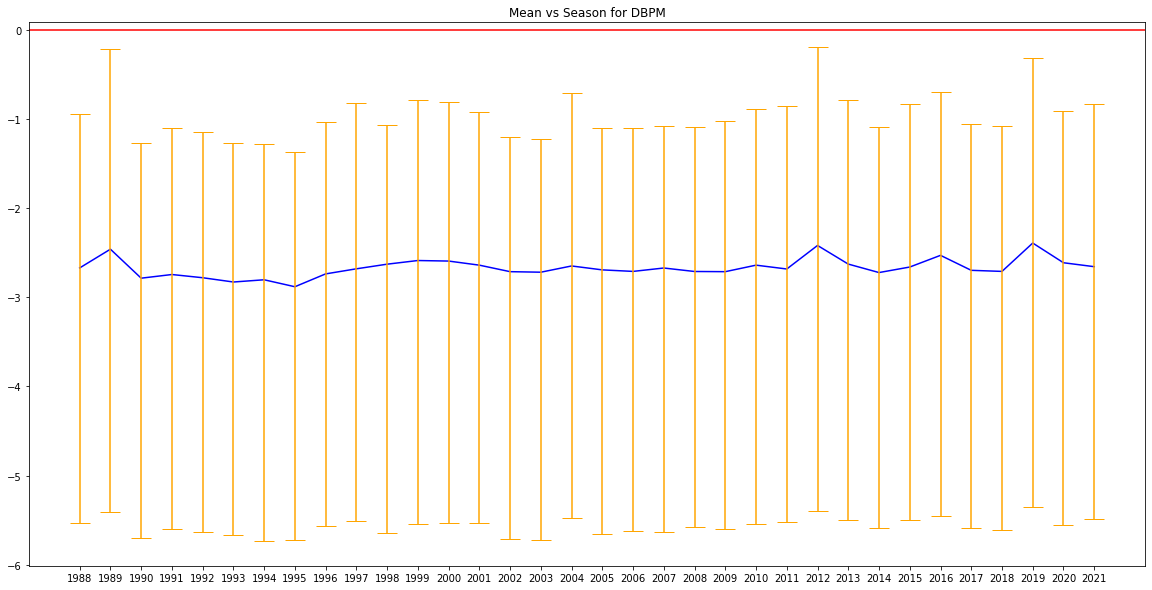

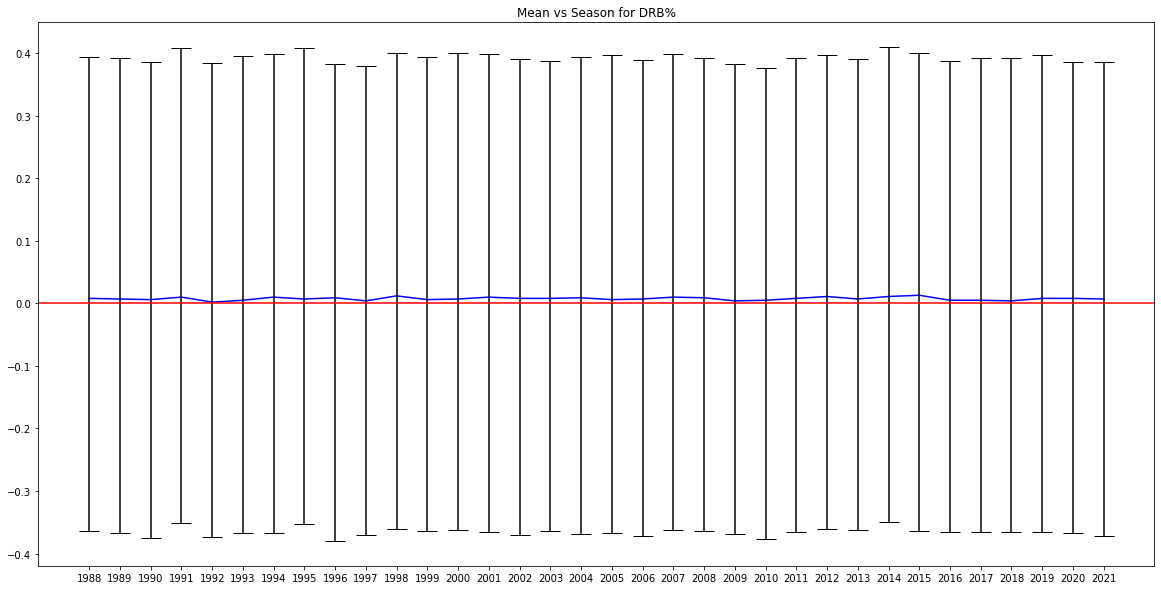

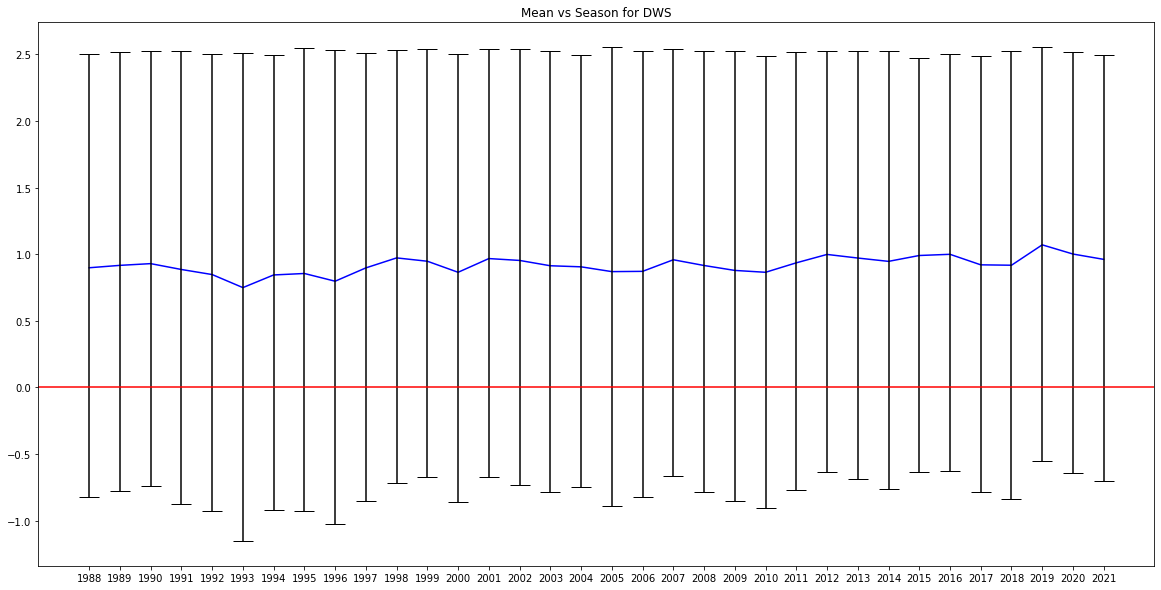

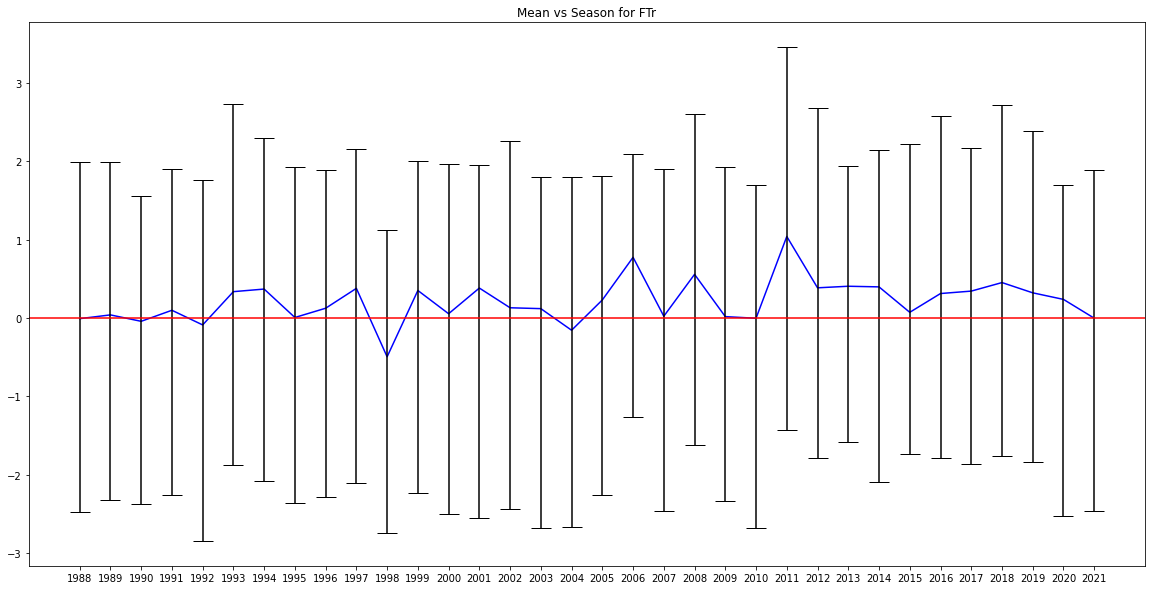

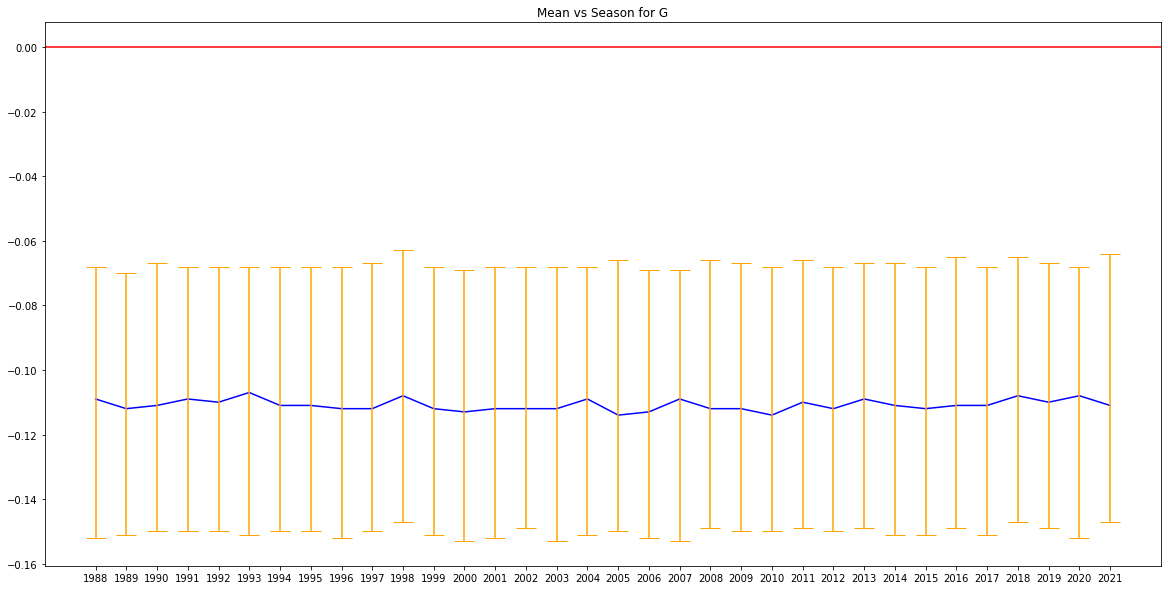

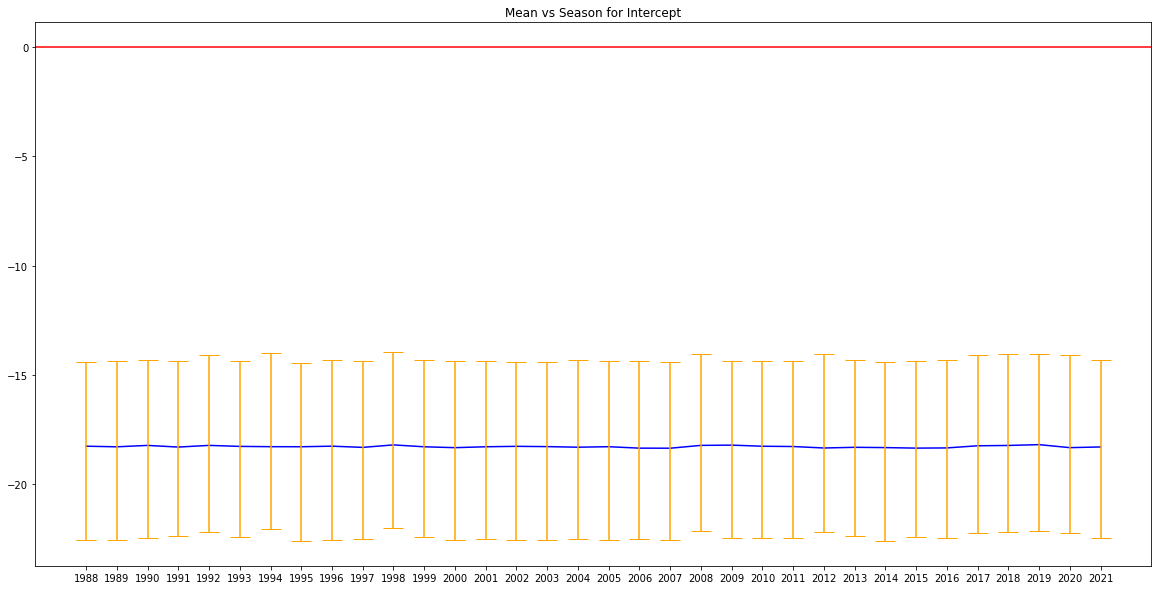

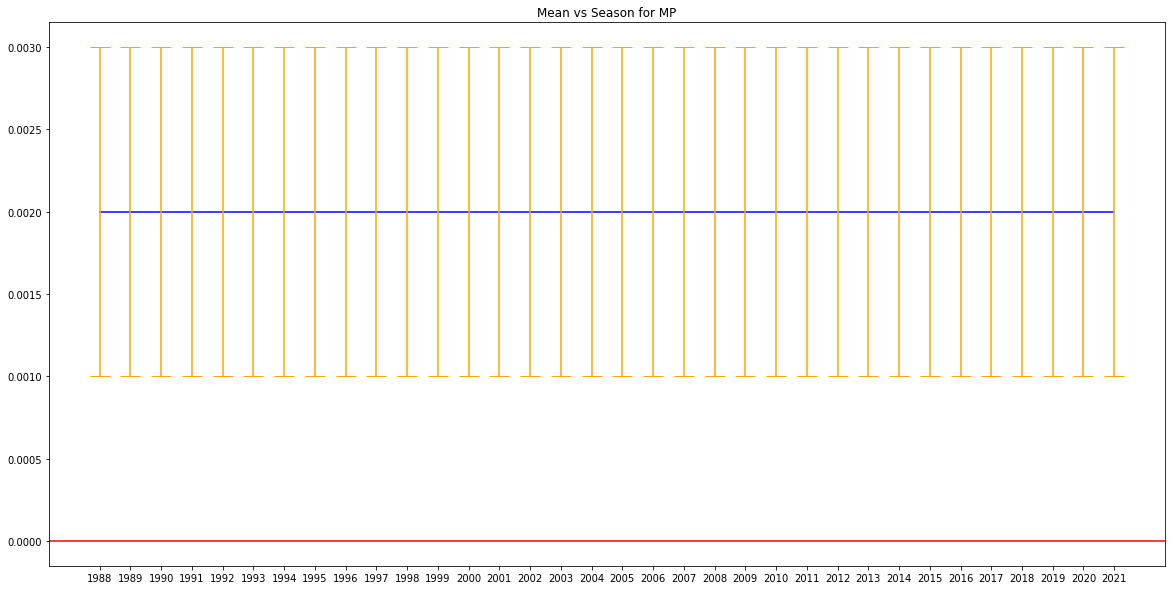

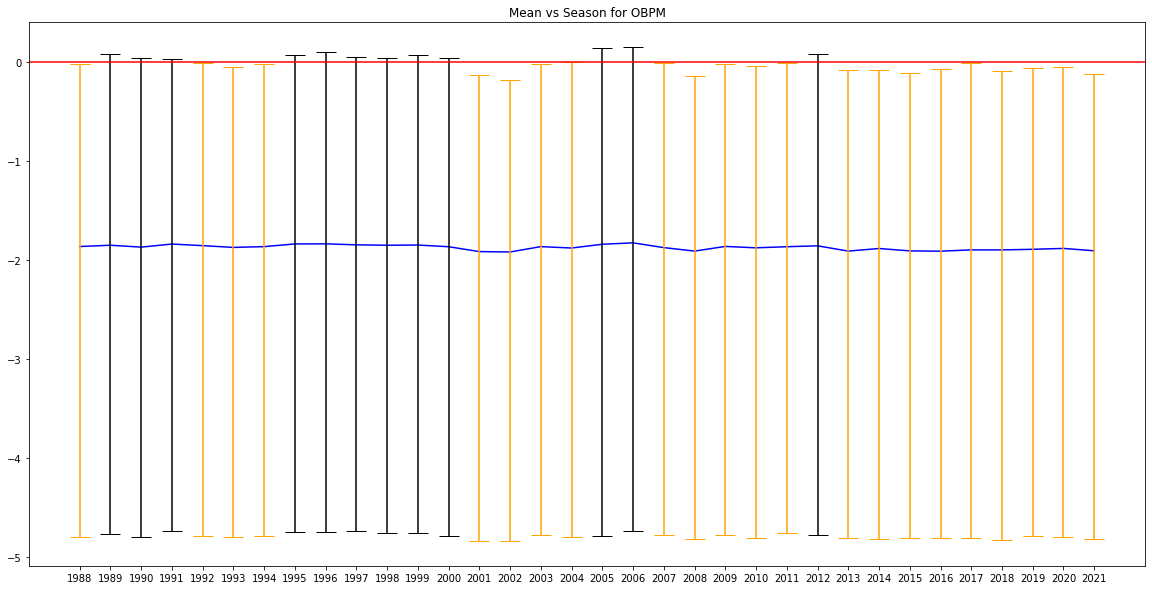

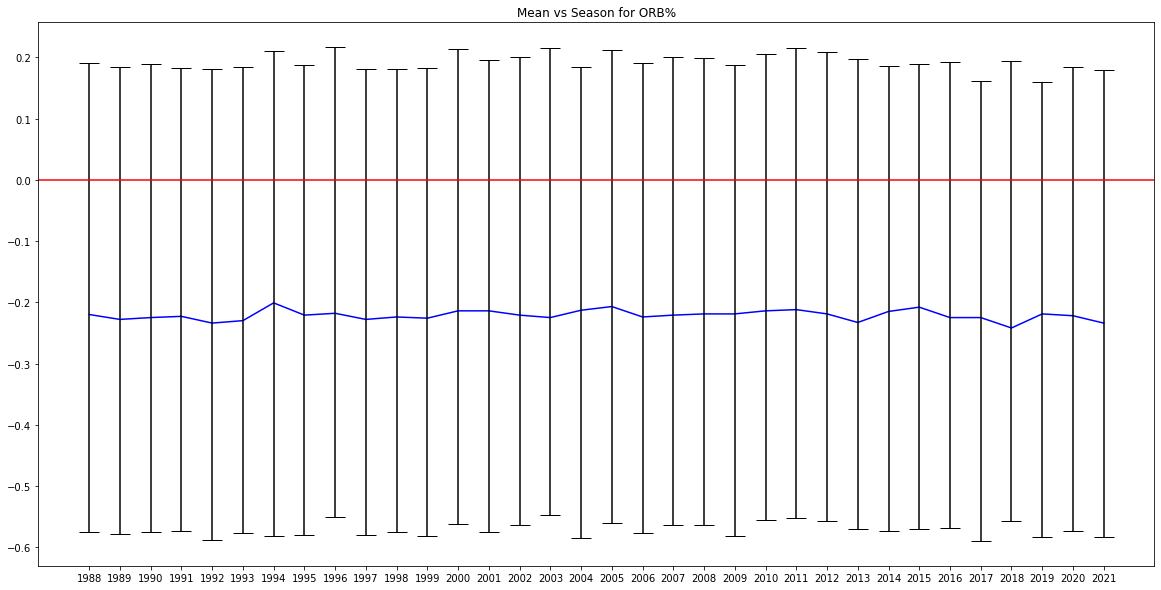

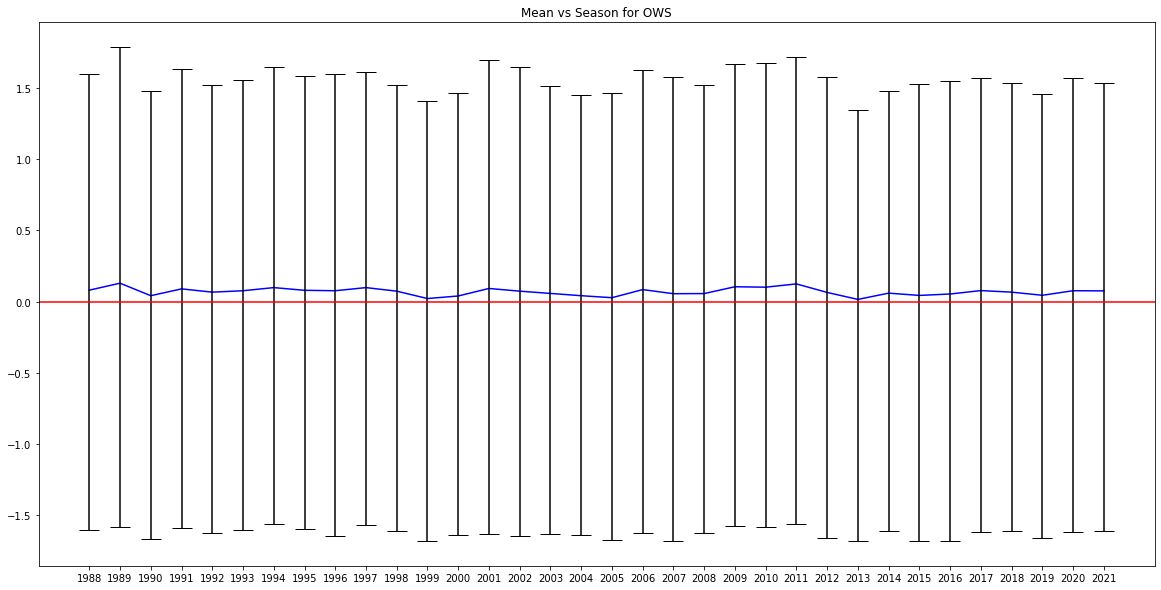

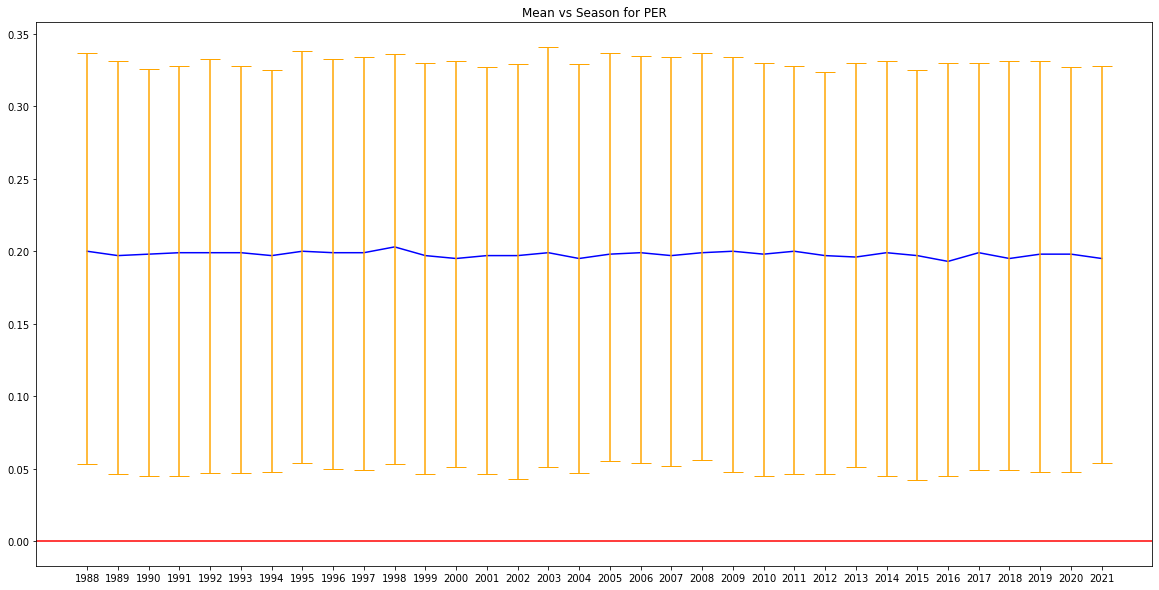

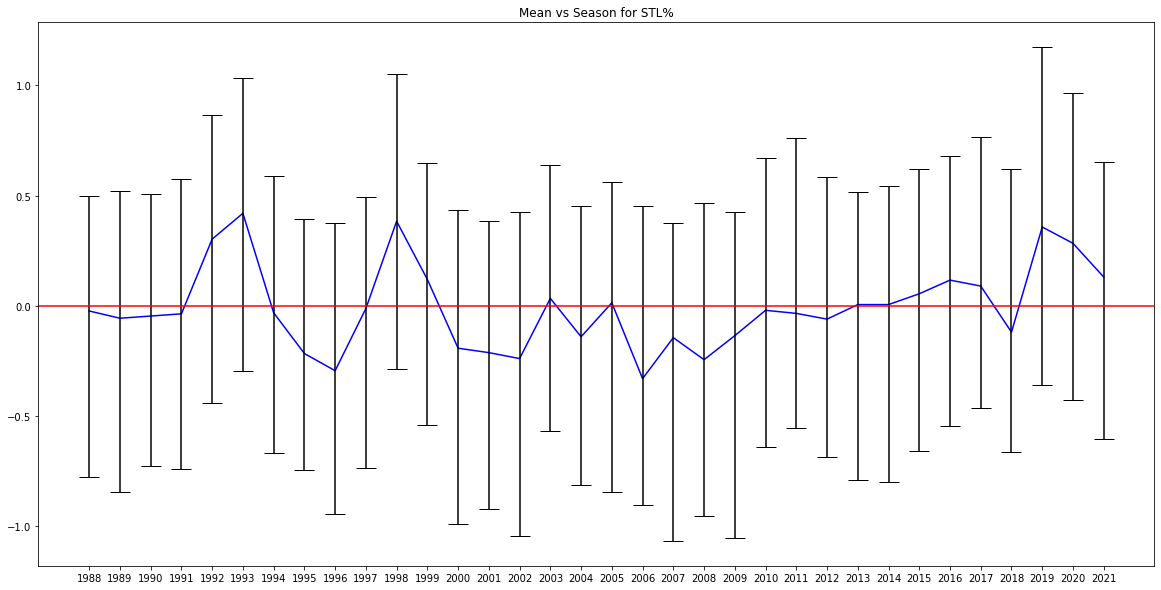

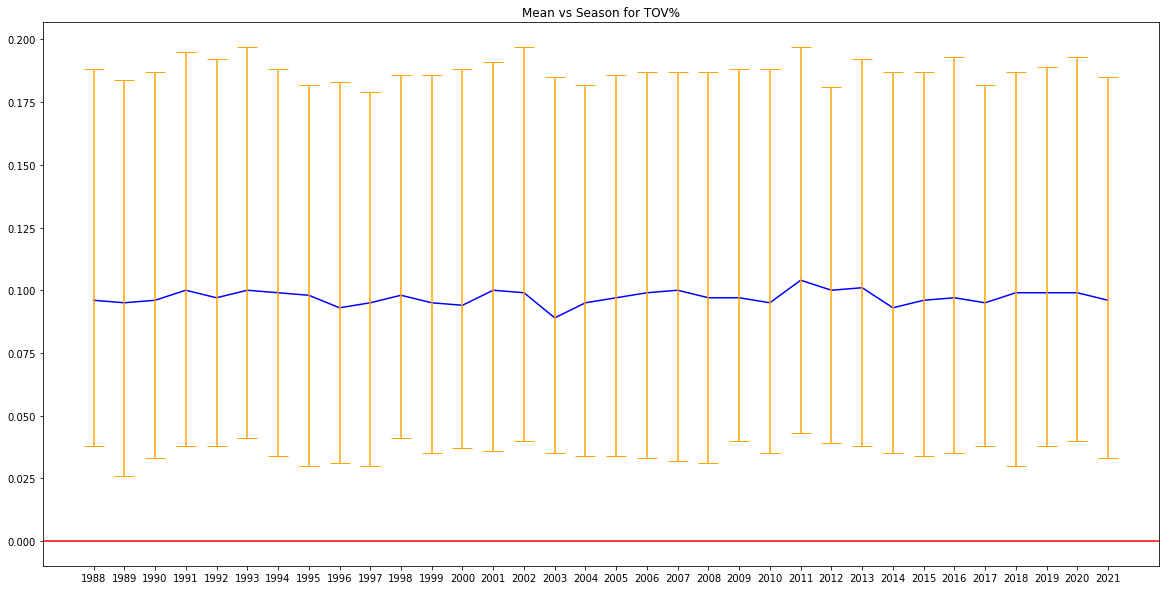

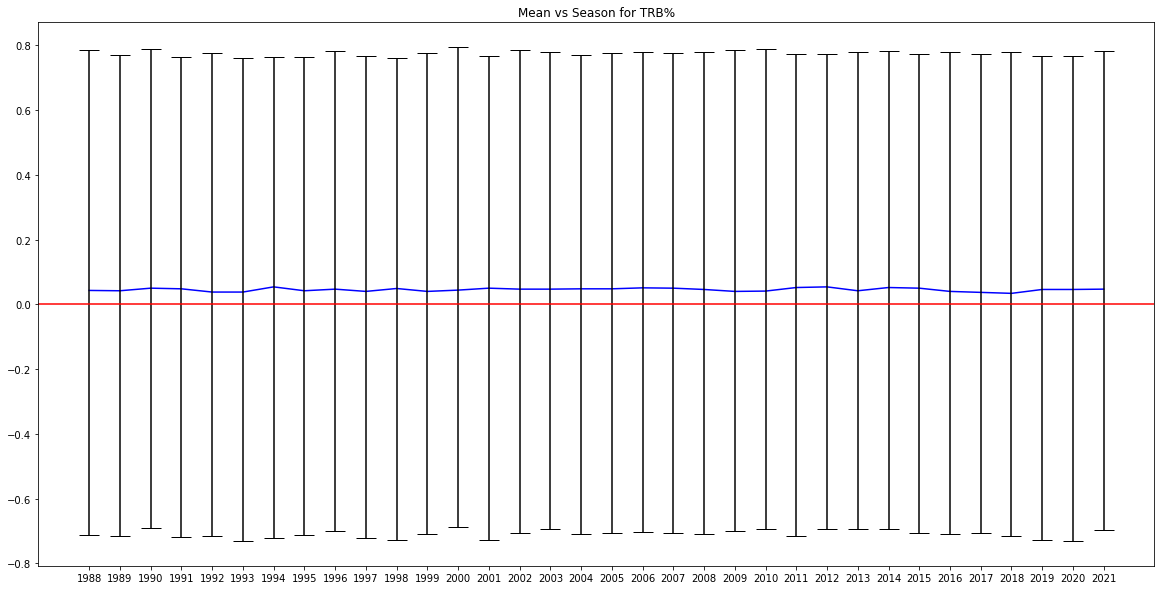

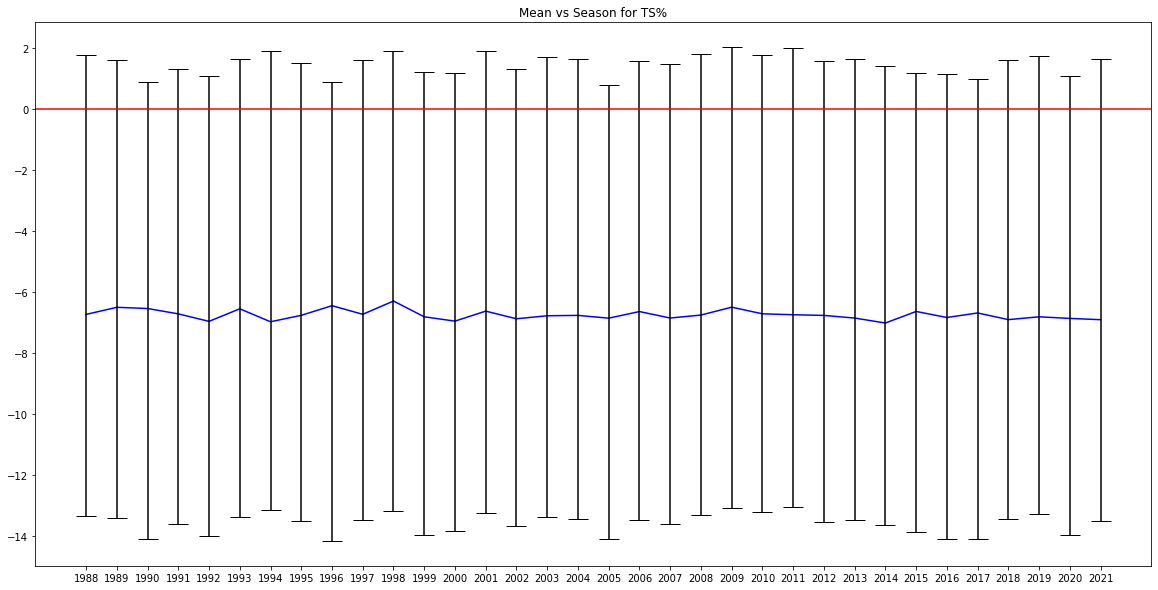

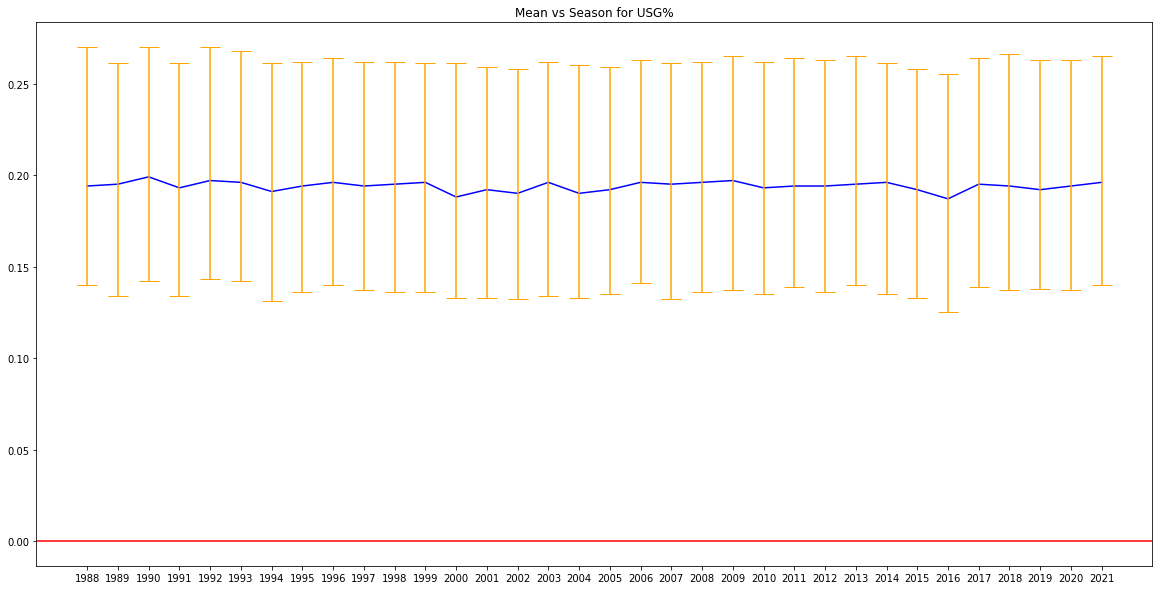

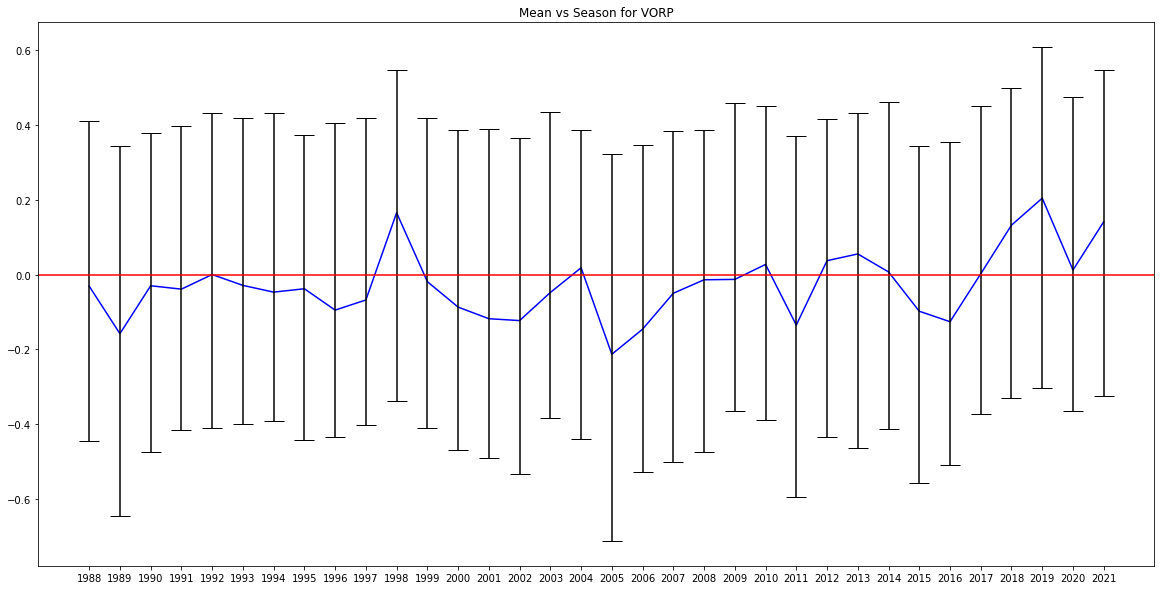

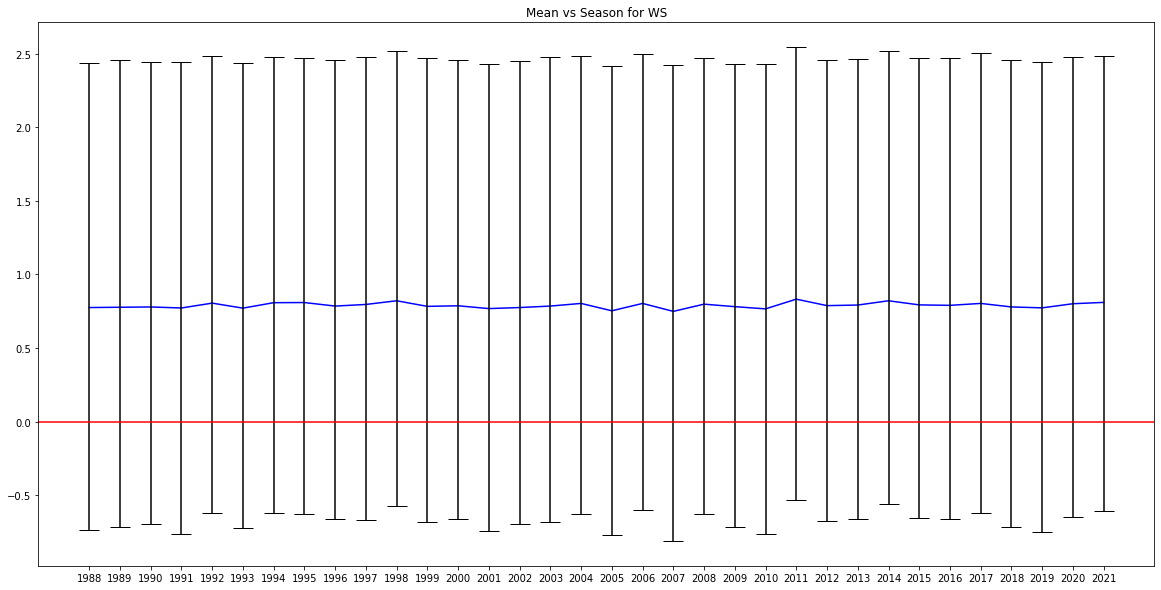

In [59]:
import warnings
warnings.filterwarnings("ignore")
for i in np.unique(betas_all_predictor['predictor']):
    temp = betas_all_predictor[betas_all_predictor['predictor'] == i]
    below_zero = ((temp['hdi_3%'] < 0) & (temp['hdi_97%'] < 0))
    above_zero = ((temp['hdi_3%'] > 0) & (temp['hdi_97%'] > 0))
    temp['sig'] = np.where((below_zero | above_zero), True, False)
    temp1 = temp[temp['sig'] == True]
    temp2 = temp[temp['sig'] == False]
    plt.figure(figsize=(20,10))
    plt.plot(temp['season'], temp['mean'], color='blue')
    plt.errorbar(temp1['season'], 
                 temp1['mean'], 
                 yerr=[temp1['mean'] - temp1['hdi_3%'], temp1['hdi_97%'] - temp1['mean']],
                 ecolor = 'orange',
                 capsize=10,linestyle='')
    plt.errorbar(temp2['season'], 
                 temp2['mean'], 
                 yerr=[temp2['mean'] - temp2['hdi_3%'], temp2['hdi_97%'] - temp2['mean']],
                 ecolor = 'black',
                 capsize=10,linestyle='')
    plt.axhline(y=0, color='red')
    plt.title('Mean vs Season for {}'.format(i))